In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'cleaned_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,user_id,order_id,submit_datetime,skuid,registration_marker,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,free_test_section_count,free_test_count,max_streak,number_of_study_plans,page_view_count,paid_prep_count,view_feedback_count,view_plan_count
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,0,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,CN,15.0,1.0,1.0,1.0,3.0,133.0,0.0,3.0,0.0
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,0,1706812320800000,1.706812e+09,1.706814e+09,1445.308,CA,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,0,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,0,1706822375070000,1.706822e+09,1.706824e+09,1682.277,PT,20.0,0.0,0.0,1.0,1.0,17.0,1.0,1.0,0.0
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,0,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,DJ,19.0,3.0,4.0,1.0,8.0,280.0,1.0,6.0,3.0


In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

# Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print(duplicates)

# Check for data types in the dataset
data_types = data.dtypes
print(data_types)

# Check for unique values in each column
unique_values = data.nunique()
print(unique_values)

# Check for constant columns in the dataset
constant_columns = data.columns[data.nunique() == 1]
constant_columns.tolist()

user_id                     0
order_id                    0
submit_datetime             0
skuid                       0
registration_marker         0
profile_created_time        0
profile_created_time_sec    0
order_sumitted              0
time_diff_sec               0
COUNTRY                     0
AGE                         0
free_test_section_count     0
free_test_count             0
max_streak                  0
number_of_study_plans       0
page_view_count             0
paid_prep_count             0
view_feedback_count         0
view_plan_count             0
dtype: int64
0
user_id                      object
order_id                      int64
submit_datetime              object
skuid                         int64
registration_marker           int64
profile_created_time          int64
profile_created_time_sec    float64
order_sumitted              float64
time_diff_sec               float64
COUNTRY                      object
AGE                         float64
free_test_section_c

['registration_marker']

In [3]:
# Drop the constant columns from the dataset
data = data.drop(constant_columns, axis=1)

# Confirm the column has been dropped
data.head()

,user_id,order_id,submit_datetime,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,free_test_section_count,free_test_count,max_streak,number_of_study_plans,page_view_count,paid_prep_count,view_feedback_count,view_plan_count
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,CN,15.0,1.0,1.0,1.0,3.0,133.0,0.0,3.0,0.0
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,1706812320800000,1.706812e+09,1.706814e+09,1445.308,CA,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,1706822375070000,1.706822e+09,1.706824e+09,1682.277,PT,20.0,0.0,0.0,1.0,1.0,17.0,1.0,1.0,0.0
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,DJ,19.0,3.0,4.0,1.0,8.0,280.0,1.0,6.0,3.0


COUNTRY
US    944
DE    762
IN    361
BR    326
FR    284
     ... 
BB      1
NE      1
CX      1
MN      1
MP      1
Name: count, Length: 166, dtype: int64
COUNTRY
US    944
DE    762
IN    361
BR    326
FR    284
Name: count, dtype: int64


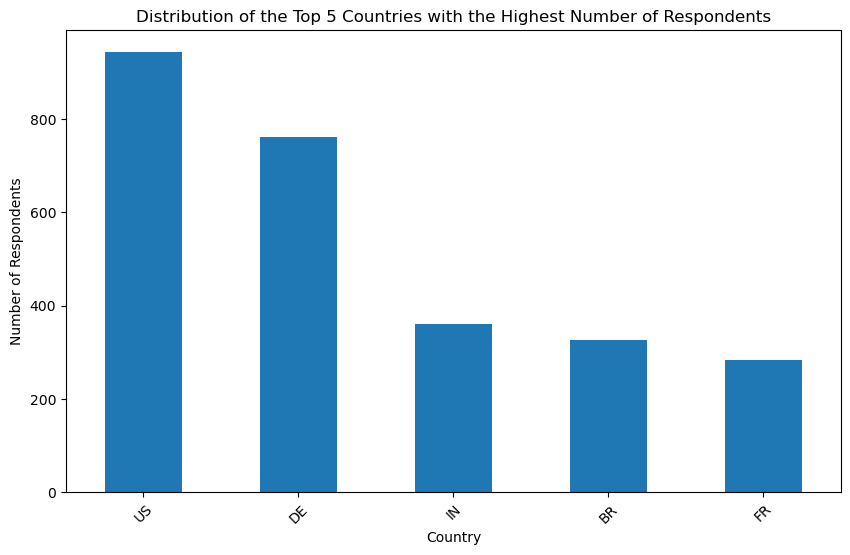

In [4]:
# Identify categorical variables in the dataset
categorical_variables = data.select_dtypes(include=['object']).columns
categorical_variables_list = categorical_variables.tolist()

# Distribution of the 'COUNTRY' column
country_distribution = data['COUNTRY'].value_counts()
print(country_distribution)

# Identify the top 5 countries with the highest number of respondents
top_5_countries = country_distribution.head(5)
print(top_5_countries)


import matplotlib.pyplot as plt

# Plot the distribution of the top  countries with the highest number of respondents
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar')
plt.title('Distribution of the Top 5 Countries with the Highest Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

In [5]:
import numpy as np

# Encode the top 5 countries individually and group the rest as 'Others'
top_5_countries_list = top_5_countries.index.tolist()
data['COUNTRY'] = np.where(data['COUNTRY'].isin(top_5_countries_list), data['COUNTRY'], 'Others')

# The distribution of the COUNTRY column after encoding
country_distribution_encoded = data['COUNTRY'].value_counts()

# Create a new column 'COUNTRY_GROUPED' where less frequent countries are grouped as 'Other'
data['COUNTRY_GROUPED'] = np.where(data['COUNTRY'].isin(top_5_countries_list), data['COUNTRY'], 'Others')

# Perform one-hot encoding on the 'COUNTRY_GROUPED' column
data_encoded = pd.get_dummies(data, columns=['COUNTRY_GROUPED'], drop_first=True)
data_encoded

,user_id,order_id,submit_datetime,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,...,number_of_study_plans,page_view_count,paid_prep_count,view_feedback_count,view_plan_count,COUNTRY_GROUPED_DE,COUNTRY_GROUPED_FR,COUNTRY_GROUPED_IN,COUNTRY_GROUPED_Others,COUNTRY_GROUPED_US
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,Others,15.0,...,3.0,133.0,0.0,3.0,0.0,False,False,False,True,False
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,1706812320800000,1.706812e+09,1.706814e+09,1445.308,Others,37.0,...,1.0,1.0,0.0,0.0,0.0,False,False,False,True,False
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,...,1.0,1.0,0.0,0.0,1.0,False,False,False,False,True
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,1706822375070000,1.706822e+09,1.706824e+09,1682.277,Others,20.0,...,1.0,17.0,1.0,1.0,0.0,False,False,False,True,False
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,Others,19.0,...,8.0,280.0,1.0,6.0,3.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,9PFD1E4D,138169333,2024-04-09 20:54:12.643000+00:00,6051,1712322020982000,1.712322e+09,1.712696e+09,374031.661,US,36.0,...,2.0,94.0,0.0,0.0,3.0,False,False,False,False,True
5855,9QFE51C5,138308135,2024-05-21 00:09:25.091000+00:00,4082,1716137949988000,1.716138e+09,1.716250e+09,112215.103,Others,26.0,...,1.0,32.0,2.0,0.0,0.0,False,False,False,True,False
5856,9QG43163,138018490,2024-03-02 20:05:28.117000+00:00,4053,1706975861796000,1.706976e+09,1.709410e+09,2434066.321,US,41.0,...,12.0,417.0,2.0,39.0,0.0,False,False,False,False,True
5857,9TG483G9,138071901,2024-03-14 04:32:06.628000+00:00,6051,1709999807137000,1.710000e+09,1.710391e+09,390919.491,Others,59.0,...,3.0,241.0,0.0,13.0,0.0,False,False,False,True,False


In [6]:
# Calculate the proportions of each country after encoding
country_proportions = data['COUNTRY'].value_counts(normalize=True)

# Convert the proportions to percentages
country_proportions_percent = country_proportions * 100

country_proportions_percent

COUNTRY
Others    54.309609
US        16.111964
DE        13.005632
IN         6.161461
BR         5.564089
FR         4.847244
Name: proportion, dtype: float64

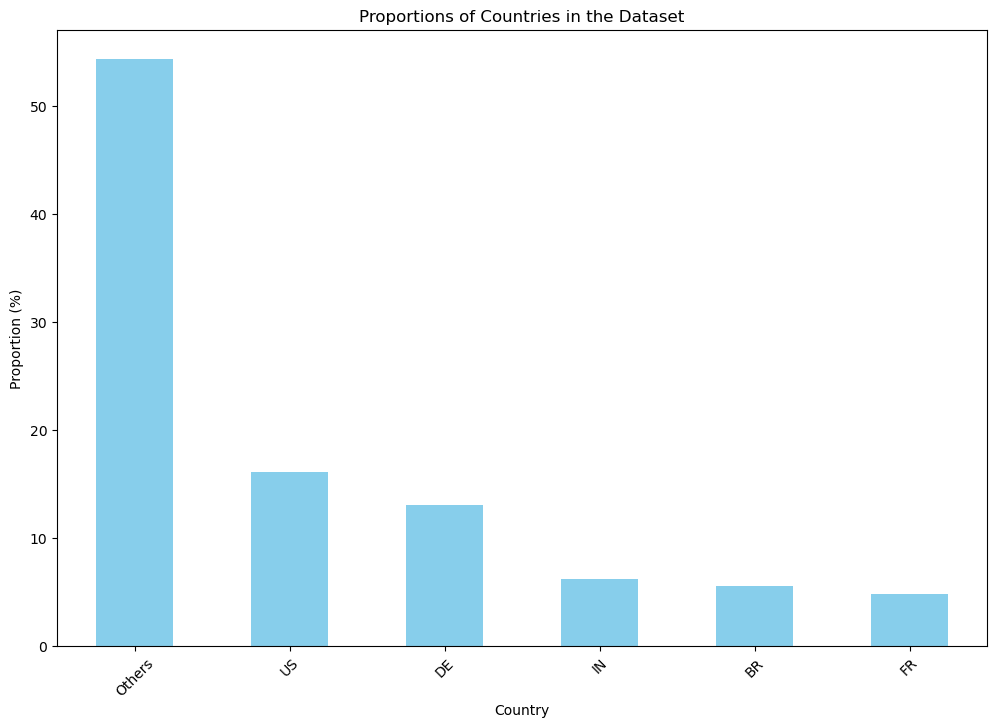

In [7]:
# Plot the proportions of the countries
plt.figure(figsize=(12, 8))
country_proportions_percent.plot(kind='bar', color='skyblue')
plt.title('Proportions of Countries in the Dataset')
plt.xlabel('Country')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Identify numerical variables in the dataset
numerical_variables = data_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_variables.tolist()

['order_id',
 'skuid',
 'profile_created_time',
 'profile_created_time_sec',
 'order_sumitted',
 'time_diff_sec',
 'AGE',
 'free_test_section_count',
 'free_test_count',
 'max_streak',
 'number_of_study_plans',
 'page_view_count',
 'paid_prep_count',
 'view_feedback_count',
 'view_plan_count']

In [9]:
# Compute summary statistics for the numerical variables
summary_statistics = data_encoded[numerical_variables].describe()
summary_statistics

,order_id,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,AGE,free_test_section_count,free_test_count,max_streak,number_of_study_plans,page_view_count,paid_prep_count,view_feedback_count,view_plan_count
count,5.859000e+03,5859.000000,5.859000e+03,5.859000e+03,5.859000e+03,5.859000e+03,5859.00000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000
mean,1.381325e+08,5384.259771,1.711064e+15,1.711064e+09,1.712034e+09,9.703195e+05,26.69022,1.185527,0.683393,1.299881,2.422598,76.250555,0.692439,3.208739,0.459293
std,1.213567e+05,940.998493,2.734052e+12,2.734052e+06,2.775525e+06,1.578167e+06,8.96323,2.242066,1.349968,1.018111,3.473984,139.484067,1.578912,8.591977,1.038277
min,1.378829e+08,4036.000000,1.706749e+15,1.706749e+09,1.706750e+09,8.754800e+01,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.380340e+08,4053.000000,1.708702e+15,1.708702e+09,1.709699e+09,1.737316e+03,21.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.381466e+08,6051.000000,1.710786e+15,1.710786e+09,1.712134e+09,1.606441e+05,24.00000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
75%,1.382363e+08,6051.000000,1.713330e+15,1.713330e+09,1.714478e+09,1.362363e+06,31.00000,2.000000,1.000000,1.000000,2.000000,112.500000,1.000000,3.000000,1.000000
max,1.383289e+08,6059.000000,1.716757e+15,1.716757e+09,1.716765e+09,9.512547e+06,133.00000,31.000000,25.000000,19.000000,53.000000,2495.000000,53.000000,271.000000,14.000000


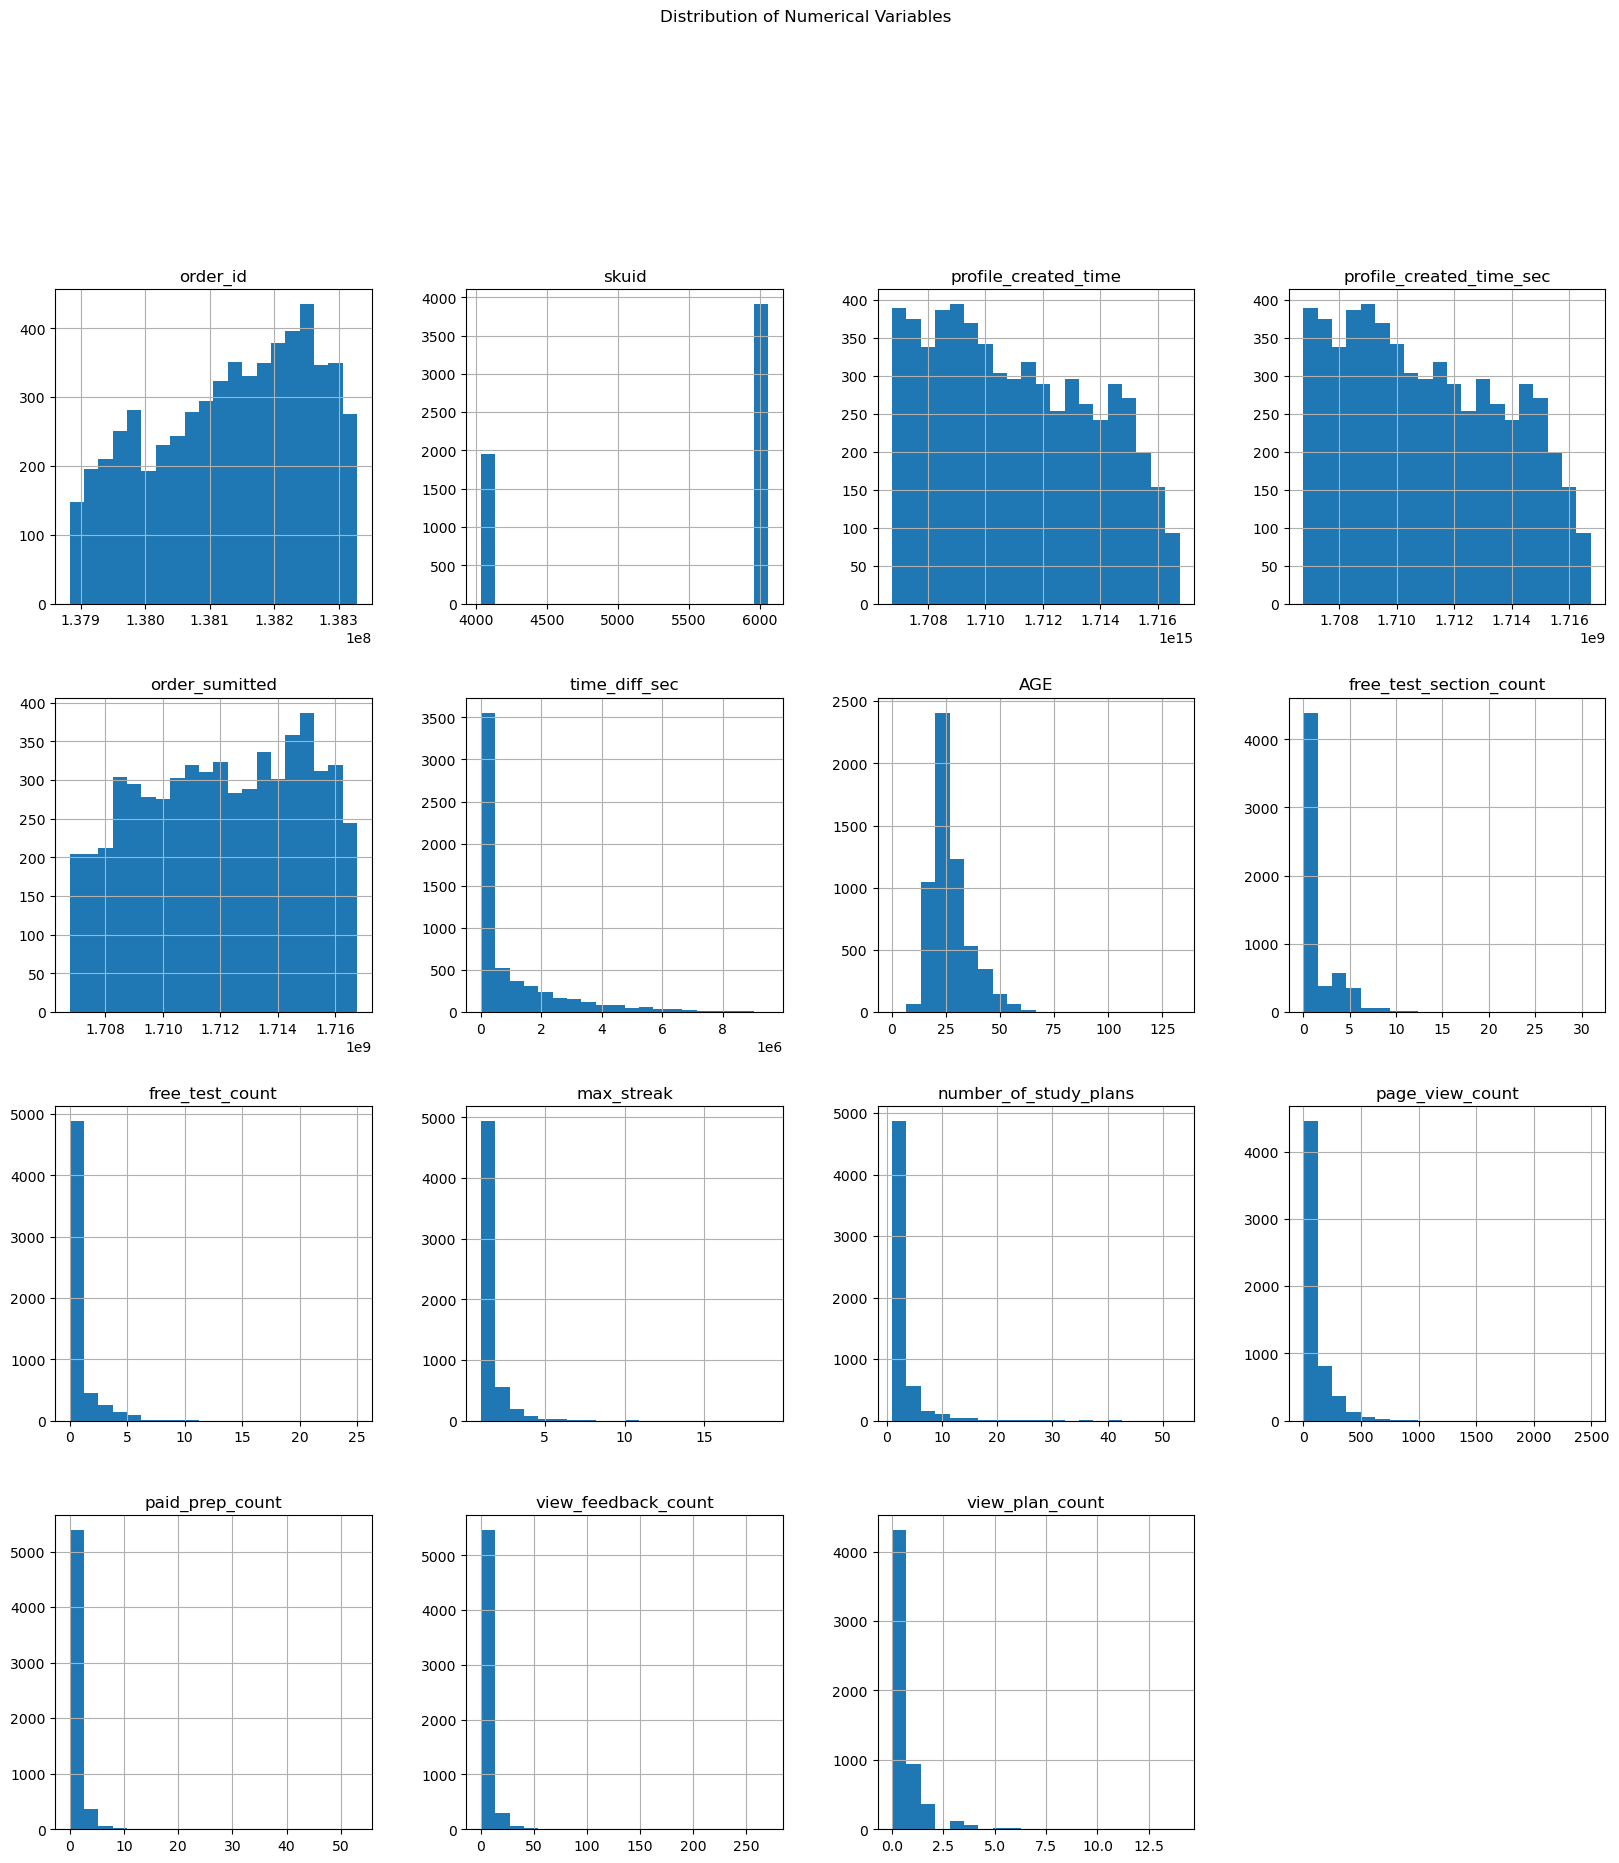

In [10]:
# Plot the distribution of the numerical variables
data_encoded[numerical_variables].hist(bins=20, figsize=(20, 20))
plt.suptitle('Distribution of Numerical Variables', y=1.02)
plt.show()

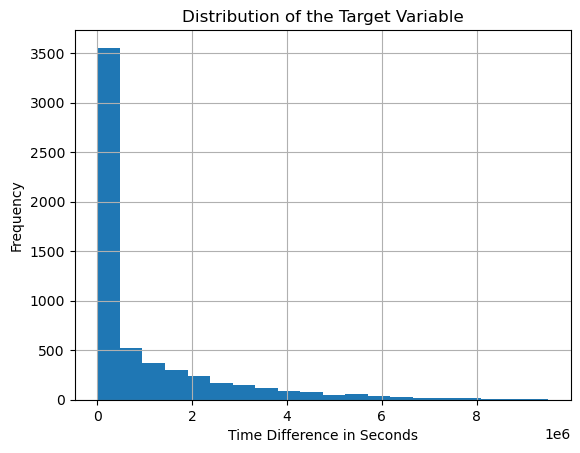

In [11]:
# Histogram of the target variable to check the distribution
data_encoded['time_diff_sec'].hist(bins=20)
plt.title('Distribution of the Target Variable')
plt.xlabel('Time Difference in Seconds')
plt.ylabel('Frequency')
plt.show()

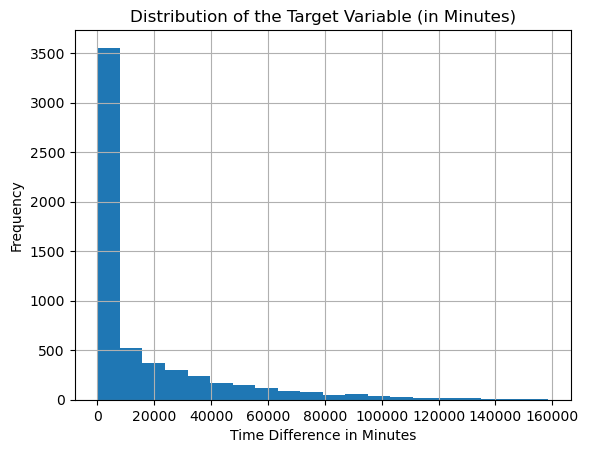

,user_id,order_id,submit_datetime,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,...,page_view_count,paid_prep_count,view_feedback_count,view_plan_count,COUNTRY_GROUPED_DE,COUNTRY_GROUPED_FR,COUNTRY_GROUPED_IN,COUNTRY_GROUPED_Others,COUNTRY_GROUPED_US,time_diff_min
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,Others,15.0,...,133.0,0.0,3.0,0.0,False,False,False,True,False,24426.004583
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,1706812320800000,1.706812e+09,1.706814e+09,1445.308,Others,37.0,...,1.0,0.0,0.0,0.0,False,False,False,True,False,24.088467
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,...,1.0,0.0,0.0,1.0,False,False,False,False,True,14566.116350
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,1706822375070000,1.706822e+09,1.706824e+09,1682.277,Others,20.0,...,17.0,1.0,1.0,0.0,False,False,False,True,False,28.037950
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,Others,19.0,...,280.0,1.0,6.0,3.0,False,False,False,True,False,57990.647800


In [12]:
# Convert the target variable 'time_diff_sec' to minutes
data_encoded['time_diff_min'] = data_encoded['time_diff_sec'] / 60

# Plot the histogram of the target variable 'time_diff_min'
data_encoded['time_diff_min'].hist(bins=20)
plt.title('Distribution of the Target Variable (in Minutes)')
plt.xlabel('Time Difference in Minutes')
plt.ylabel('Frequency')
plt.show()

data_encoded.head()


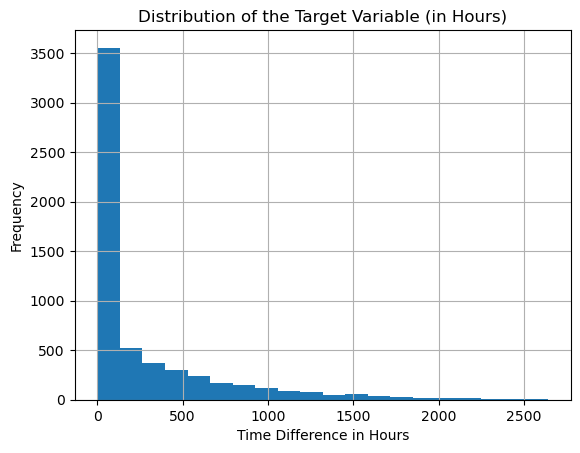

,user_id,order_id,submit_datetime,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,...,paid_prep_count,view_feedback_count,view_plan_count,COUNTRY_GROUPED_DE,COUNTRY_GROUPED_FR,COUNTRY_GROUPED_IN,COUNTRY_GROUPED_Others,COUNTRY_GROUPED_US,time_diff_min,time_diff_hours
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,Others,15.0,...,0.0,3.0,0.0,False,False,False,True,False,24426.004583,407.100076
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,1706812320800000,1.706812e+09,1.706814e+09,1445.308,Others,37.0,...,0.0,0.0,0.0,False,False,False,True,False,24.088467,0.401474
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,...,0.0,0.0,1.0,False,False,False,False,True,14566.116350,242.768606
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,1706822375070000,1.706822e+09,1.706824e+09,1682.277,Others,20.0,...,1.0,1.0,0.0,False,False,False,True,False,28.037950,0.467299
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,Others,19.0,...,1.0,6.0,3.0,False,False,False,True,False,57990.647800,966.510797


In [13]:
# Convert the target variable 'time_diff_sec' to hours
data_encoded['time_diff_hours'] = data_encoded['time_diff_sec'] / 3600

# Plot the histogram of the target variable 'time_diff_hours'
data_encoded['time_diff_hours'].hist(bins=20)
plt.title('Distribution of the Target Variable (in Hours)')
plt.xlabel('Time Difference in Hours')
plt.ylabel('Frequency')
plt.show()

data_encoded.head()


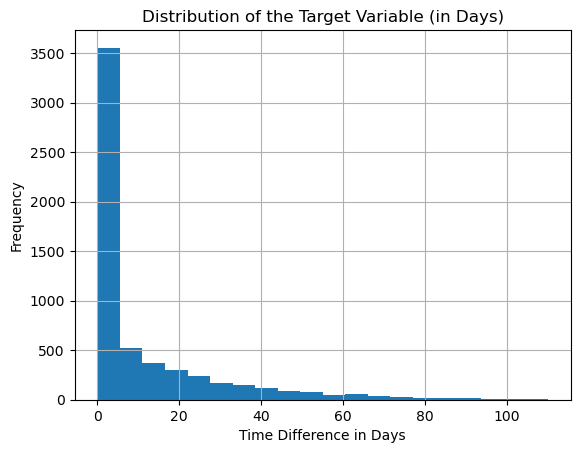

,user_id,order_id,submit_datetime,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,...,view_feedback_count,view_plan_count,COUNTRY_GROUPED_DE,COUNTRY_GROUPED_FR,COUNTRY_GROUPED_IN,COUNTRY_GROUPED_Others,COUNTRY_GROUPED_US,time_diff_min,time_diff_hours,time_diff_days
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,Others,15.0,...,3.0,0.0,False,False,False,True,False,24426.004583,407.100076,16.962503
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,1706812320800000,1.706812e+09,1.706814e+09,1445.308,Others,37.0,...,0.0,0.0,False,False,False,True,False,24.088467,0.401474,0.016728
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,...,0.0,1.0,False,False,False,False,True,14566.116350,242.768606,10.115359
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,1706822375070000,1.706822e+09,1.706824e+09,1682.277,Others,20.0,...,1.0,0.0,False,False,False,True,False,28.037950,0.467299,0.019471
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,Others,19.0,...,6.0,3.0,False,False,False,True,False,57990.647800,966.510797,40.271283


In [14]:
# Convert the target variable 'time_diff_sec' to days
data_encoded['time_diff_days'] = data_encoded['time_diff_sec'] / (3600 * 24)

# Plot the histogram of the target variable 'time_diff_days'
data_encoded['time_diff_days'].hist(bins=20)
plt.title('Distribution of the Target Variable (in Days)')
plt.xlabel('Time Difference in Days')
plt.ylabel('Frequency')
plt.show()

data_encoded.head()


In [15]:
# Compute the correlation between numerical variables and the target variable
correlation = data_encoded[numerical_variables].corrwith(data_encoded['time_diff_sec'])
correlation

order_id                    0.310320
skuid                      -0.026393
profile_created_time       -0.262135
profile_created_time_sec   -0.262135
order_sumitted              0.310383
time_diff_sec               1.000000
AGE                        -0.009720
free_test_section_count     0.325233
free_test_count             0.387395
max_streak                  0.222560
number_of_study_plans       0.471283
page_view_count             0.373306
paid_prep_count             0.107557
view_feedback_count         0.311297
view_plan_count             0.216087
dtype: float64

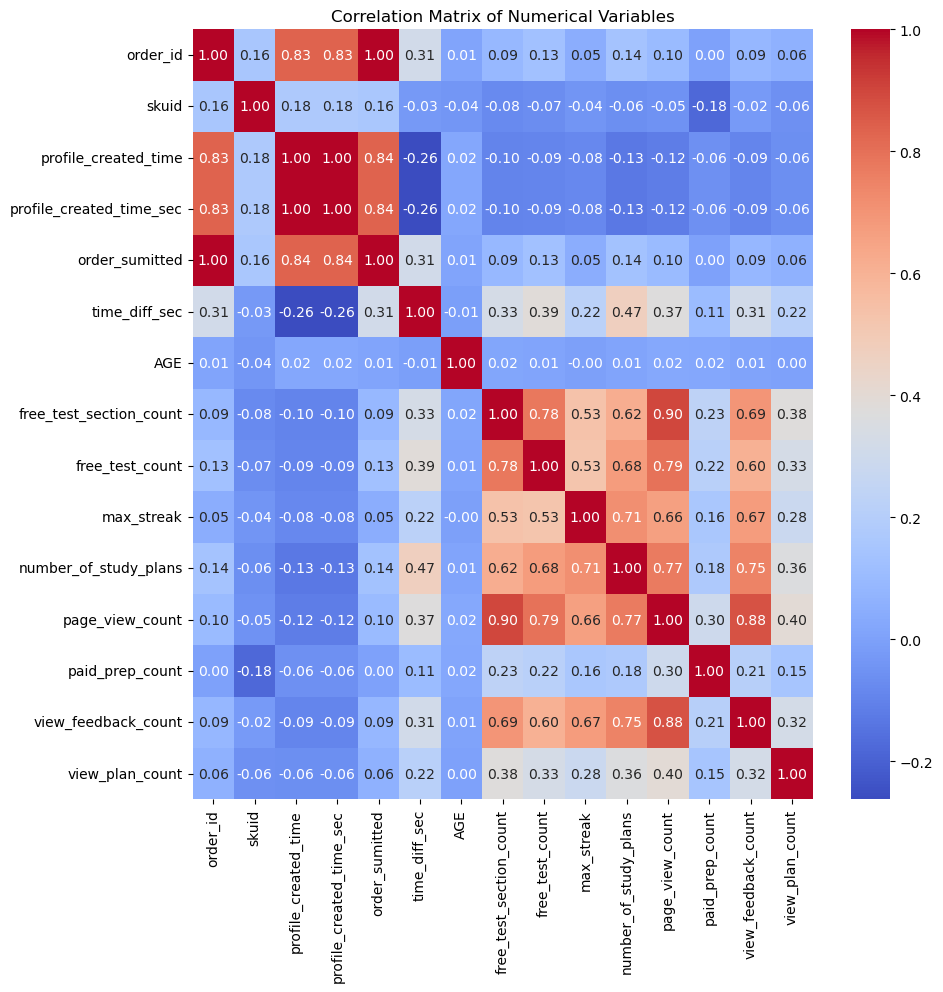

In [16]:
# Compute the correlation matrix
correlation_matrix = data_encoded[numerical_variables].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


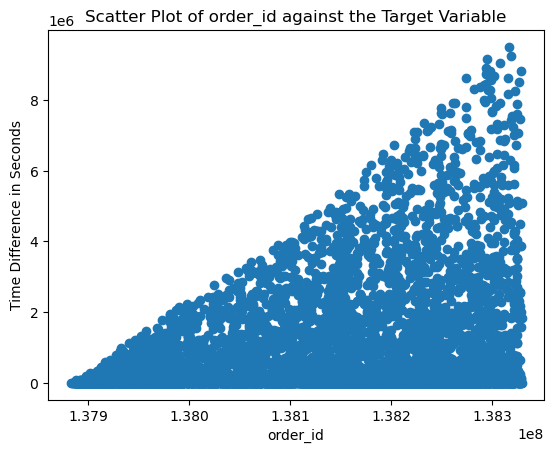

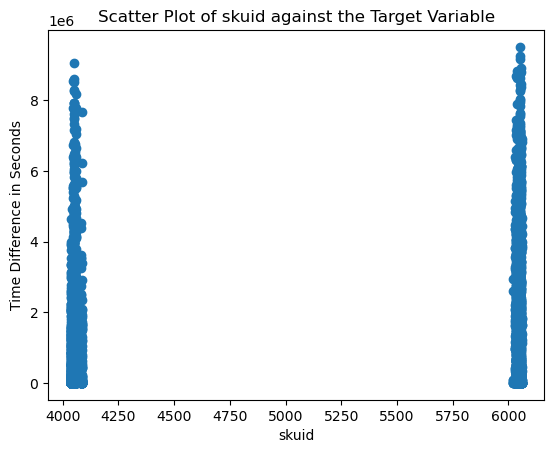

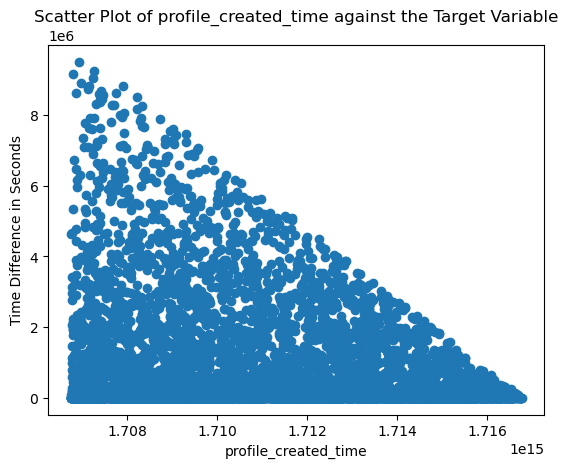

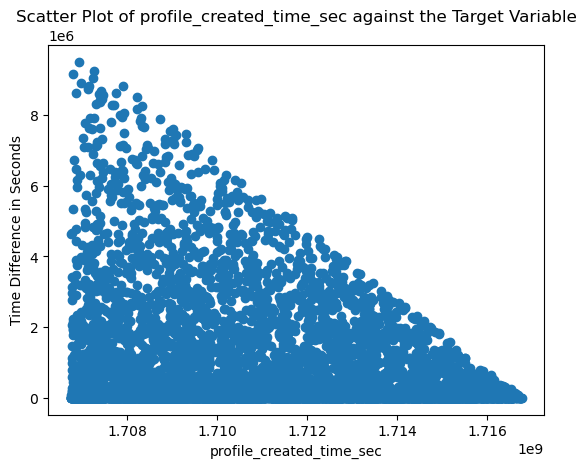

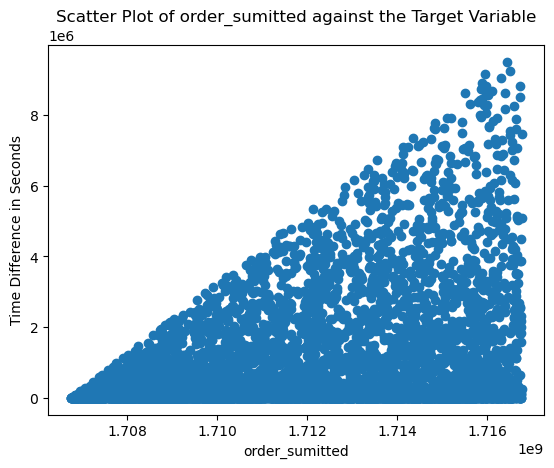

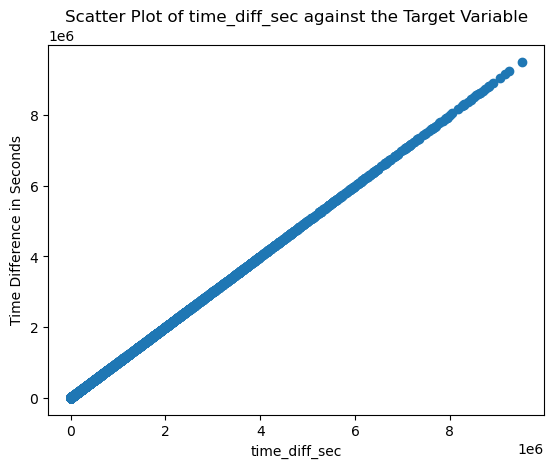

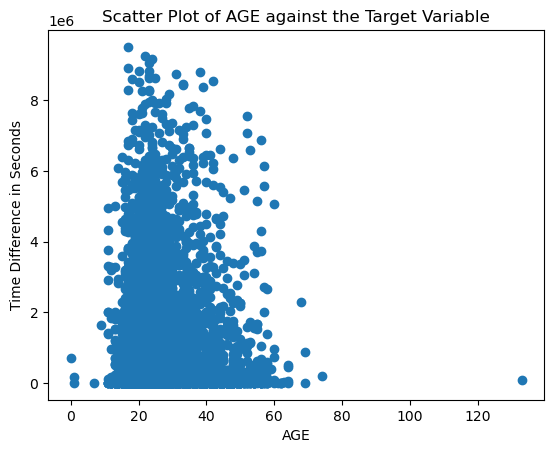

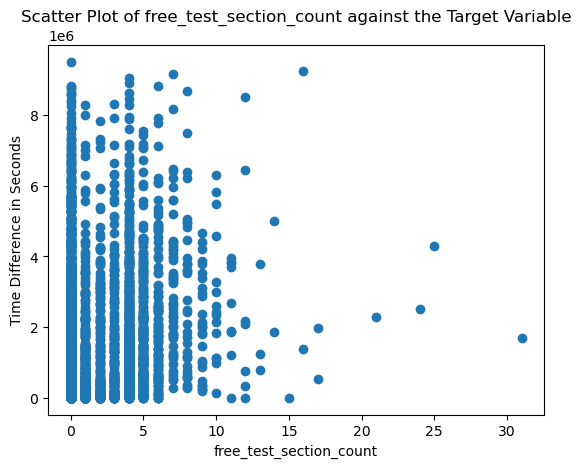

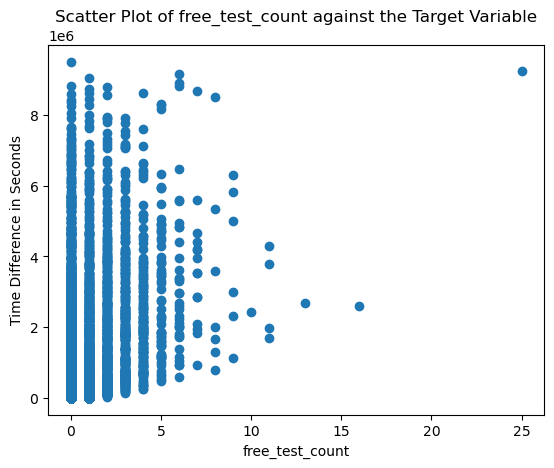

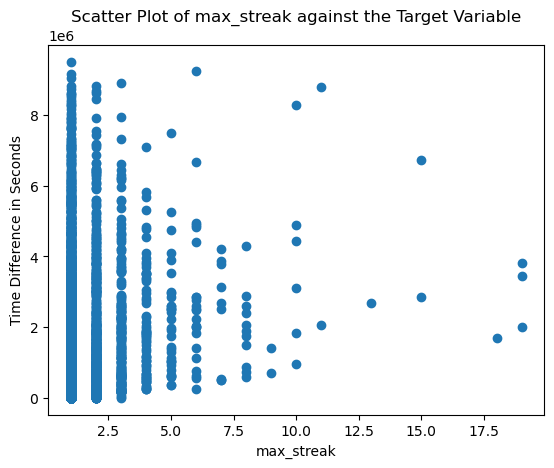

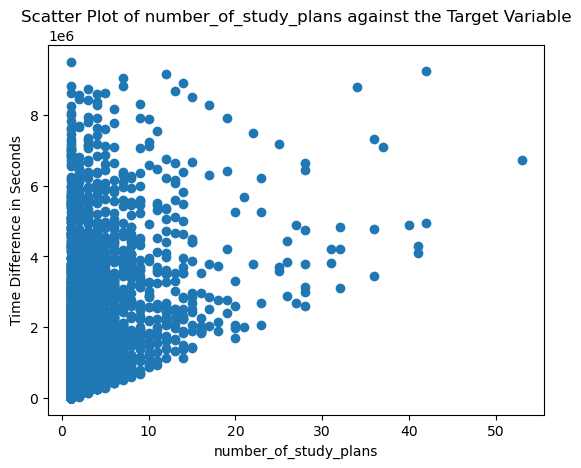

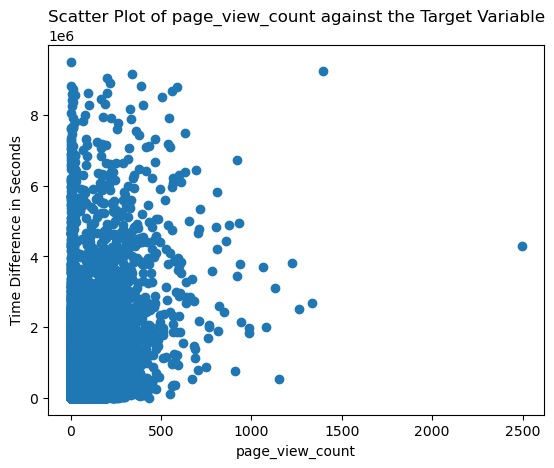

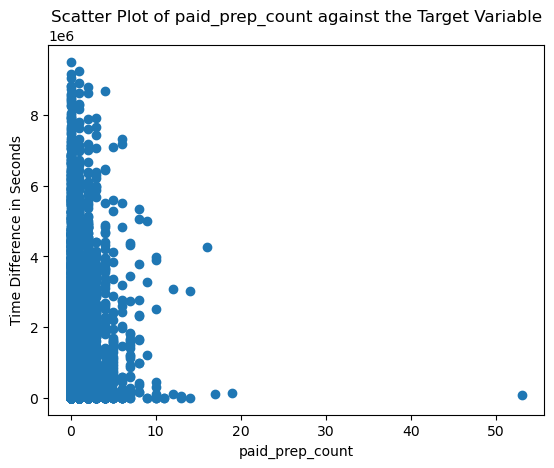

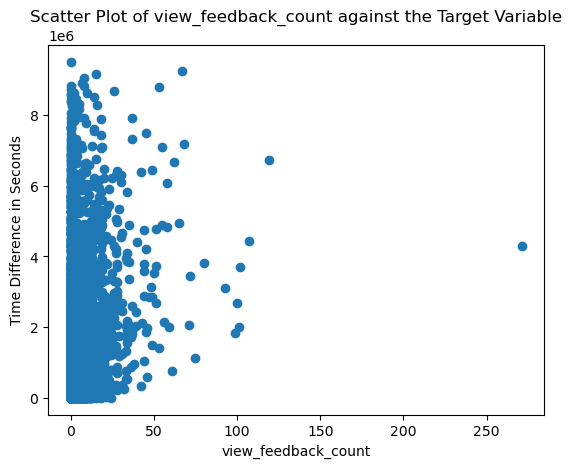

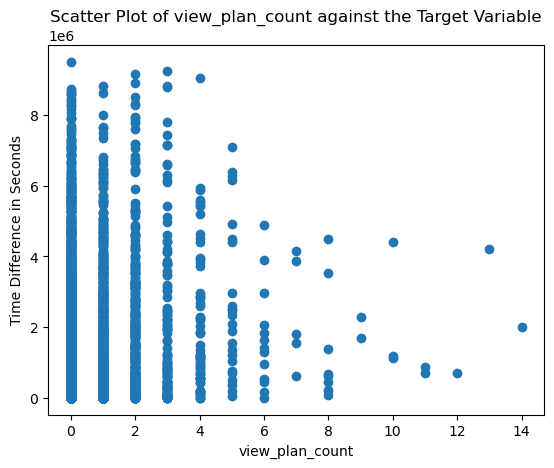

In [17]:
# Scatter plots of numerical variables against the target variable
for variable in numerical_variables:
    plt.scatter(data_encoded[variable], data_encoded['time_diff_sec'])
    plt.title(f'Scatter Plot of {variable} against the Target Variable')
    plt.xlabel(variable)
    plt.ylabel('Time Difference in Seconds')
    plt.show()

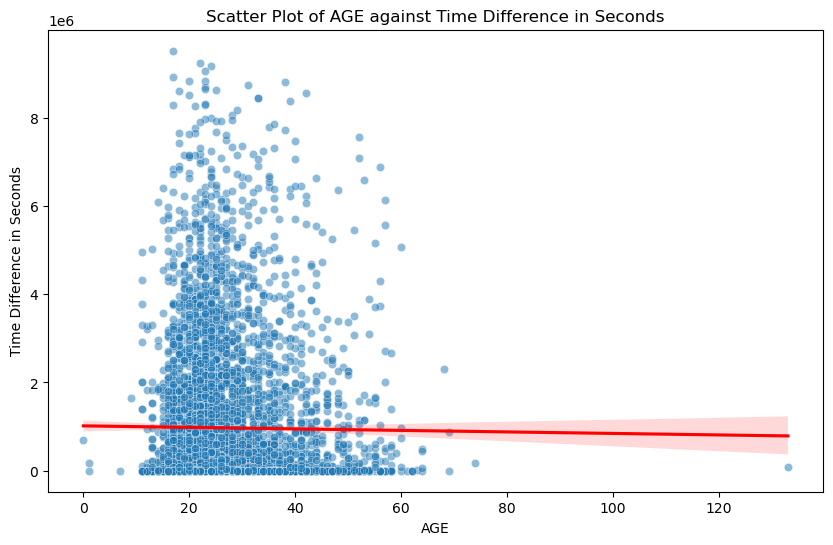

In [18]:
# Scatter plot of AGE against time_diff_sec with a linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='time_diff_sec', data=data_encoded, alpha=0.5)
sns.regplot(x='AGE', y='time_diff_sec', data=data_encoded, scatter=False, color='red')
plt.title('Scatter Plot of AGE against Time Difference in Seconds')
plt.xlabel('AGE')
plt.ylabel('Time Difference in Seconds')
plt.show()

### Observation:

- **No Strong Correlation**: The scatter plot shows a wide spread of points with no clear trend, and the linear regression line is nearly flat.
- **Conclusion**: AGE does not have a significant linear relationship with `time_diff_sec`. Changes in age do not predict time differences effectively.


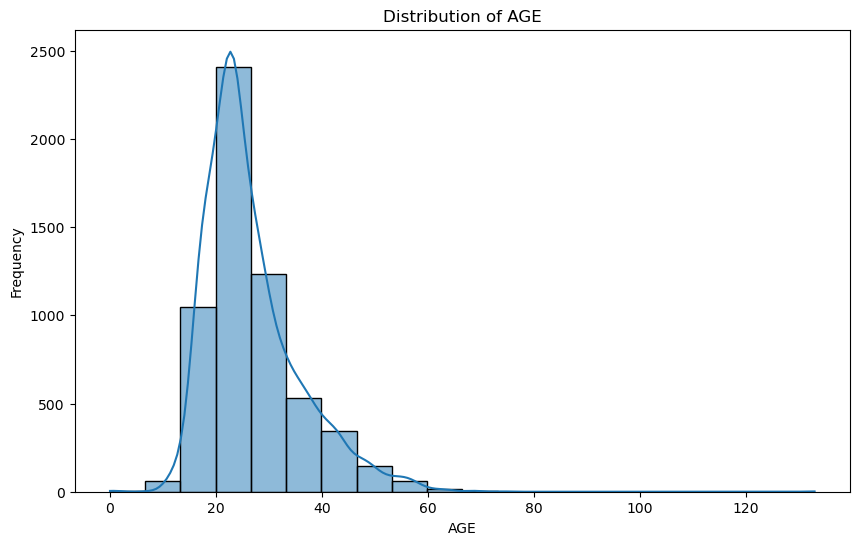

In [19]:
# Plot the distribution of the AGE variable
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['AGE'], bins=20, kde=True)
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()


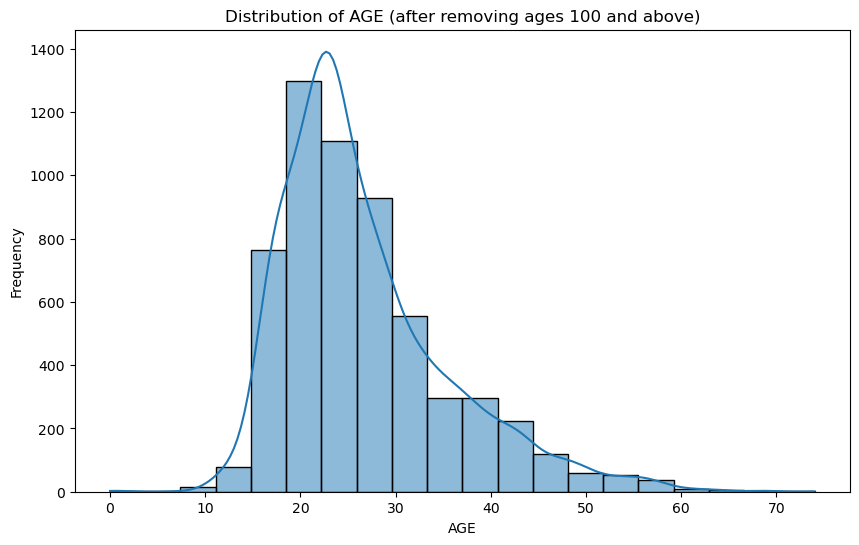

,user_id,order_id,submit_datetime,skuid,profile_created_time,profile_created_time_sec,order_sumitted,time_diff_sec,COUNTRY,AGE,...,view_feedback_count,view_plan_count,COUNTRY_GROUPED_DE,COUNTRY_GROUPED_FR,COUNTRY_GROUPED_IN,COUNTRY_GROUPED_Others,COUNTRY_GROUPED_US,time_diff_min,time_diff_hours,time_diff_days
0,13F987F6,137957563,2024-02-18 10:52:30.097000+00:00,6051,1706787989822000,1.706788e+09,1.708254e+09,1465560.275,Others,15.0,...,3.0,0.0,False,False,False,True,False,24426.004583,407.100076,16.962503
1,13F98A7A,137890605,2024-02-01 18:56:06.108000+00:00,6051,1706812320800000,1.706812e+09,1.706814e+09,1445.308,Others,37.0,...,0.0,0.0,False,False,False,True,False,24.088467,0.401474,0.016728
2,13F98AHC,137931243,2024-02-11 23:20:58.192000+00:00,6051,1706819691211000,1.706820e+09,1.707694e+09,873966.981,US,37.0,...,0.0,1.0,False,False,False,False,True,14566.116350,242.768606,10.115359
3,13F98B34,137891021,2024-02-01 21:47:37.347000+00:00,4053,1706822375070000,1.706822e+09,1.706824e+09,1682.277,Others,20.0,...,1.0,0.0,False,False,False,True,False,28.037950,0.467299,0.019471
4,13F98E1G,138070120,2024-03-13 16:43:57.363000+00:00,6042,1706868798495000,1.706869e+09,1.710348e+09,3479438.868,Others,19.0,...,6.0,3.0,False,False,False,True,False,57990.647800,966.510797,40.271283


In [20]:
# Remove rows where AGE is 100 or above
data_encoded_filtered = data_encoded[data_encoded['AGE'] < 100]

# Plot the distribution of the AGE variable after removing ages 100 and above
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded_filtered['AGE'], bins=20, kde=True)
plt.title('Distribution of AGE (after removing ages 100 and above)')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

# Display the first few rows of the filtered dataset
data_encoded_filtered.head()


In [21]:
# Find the highest age in the filtered dataset
max_age = data_encoded_filtered['AGE'].max()
max_age

74.0

In [22]:
# Calculate mean, median, and standard deviation of time_diff_sec for each country
country_performance = data_encoded.groupby('COUNTRY')['time_diff_sec'].agg(['mean', 'median', 'std']).reset_index()

country_performance


,COUNTRY,mean,median,std
0,BR,1.116093e+06,320008.4580,1.680261e+06
1,DE,9.614236e+05,194204.0450,1.465708e+06
2,FR,1.153101e+06,172829.9605,1.873705e+06
3,IN,8.032136e+05,10418.6080,1.420153e+06
4,Others,9.452924e+05,150563.2135,1.556642e+06
5,US,1.020434e+06,165508.8330,1.653768e+06


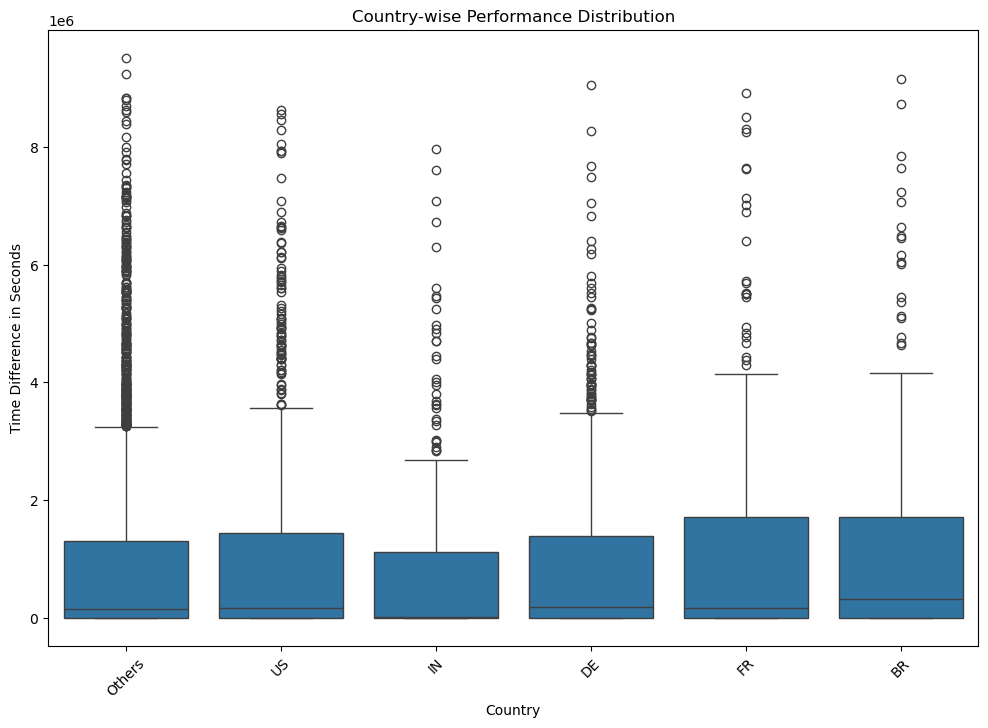

In [23]:
import seaborn as sns

# Plotting box plot for time_diff_sec by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='COUNTRY', y='time_diff_sec', data=data_encoded)
plt.title('Country-wise Performance Distribution')
plt.xlabel('Country')
plt.ylabel('Time Difference in Seconds')
plt.xticks(rotation=45)
plt.show()


### Interpretation

#### Mean
The mean values of *time_diff_sec* for different countries are fairly close to each other, suggesting that the average time difference is similar across countries.

#### Median
The median values are also close to the mean values, indicating that the distribution of *time_diff_sec* is relatively symmetric for most countries.

#### Standard Deviation
The standard deviations are in the same range but vary slightly between countries. Higher standard deviation indicates greater variability in *time_diff_sec* within that country. For example, Mexico (MX) has the highest standard deviation, suggesting more variability in the time differences among users from Mexico.


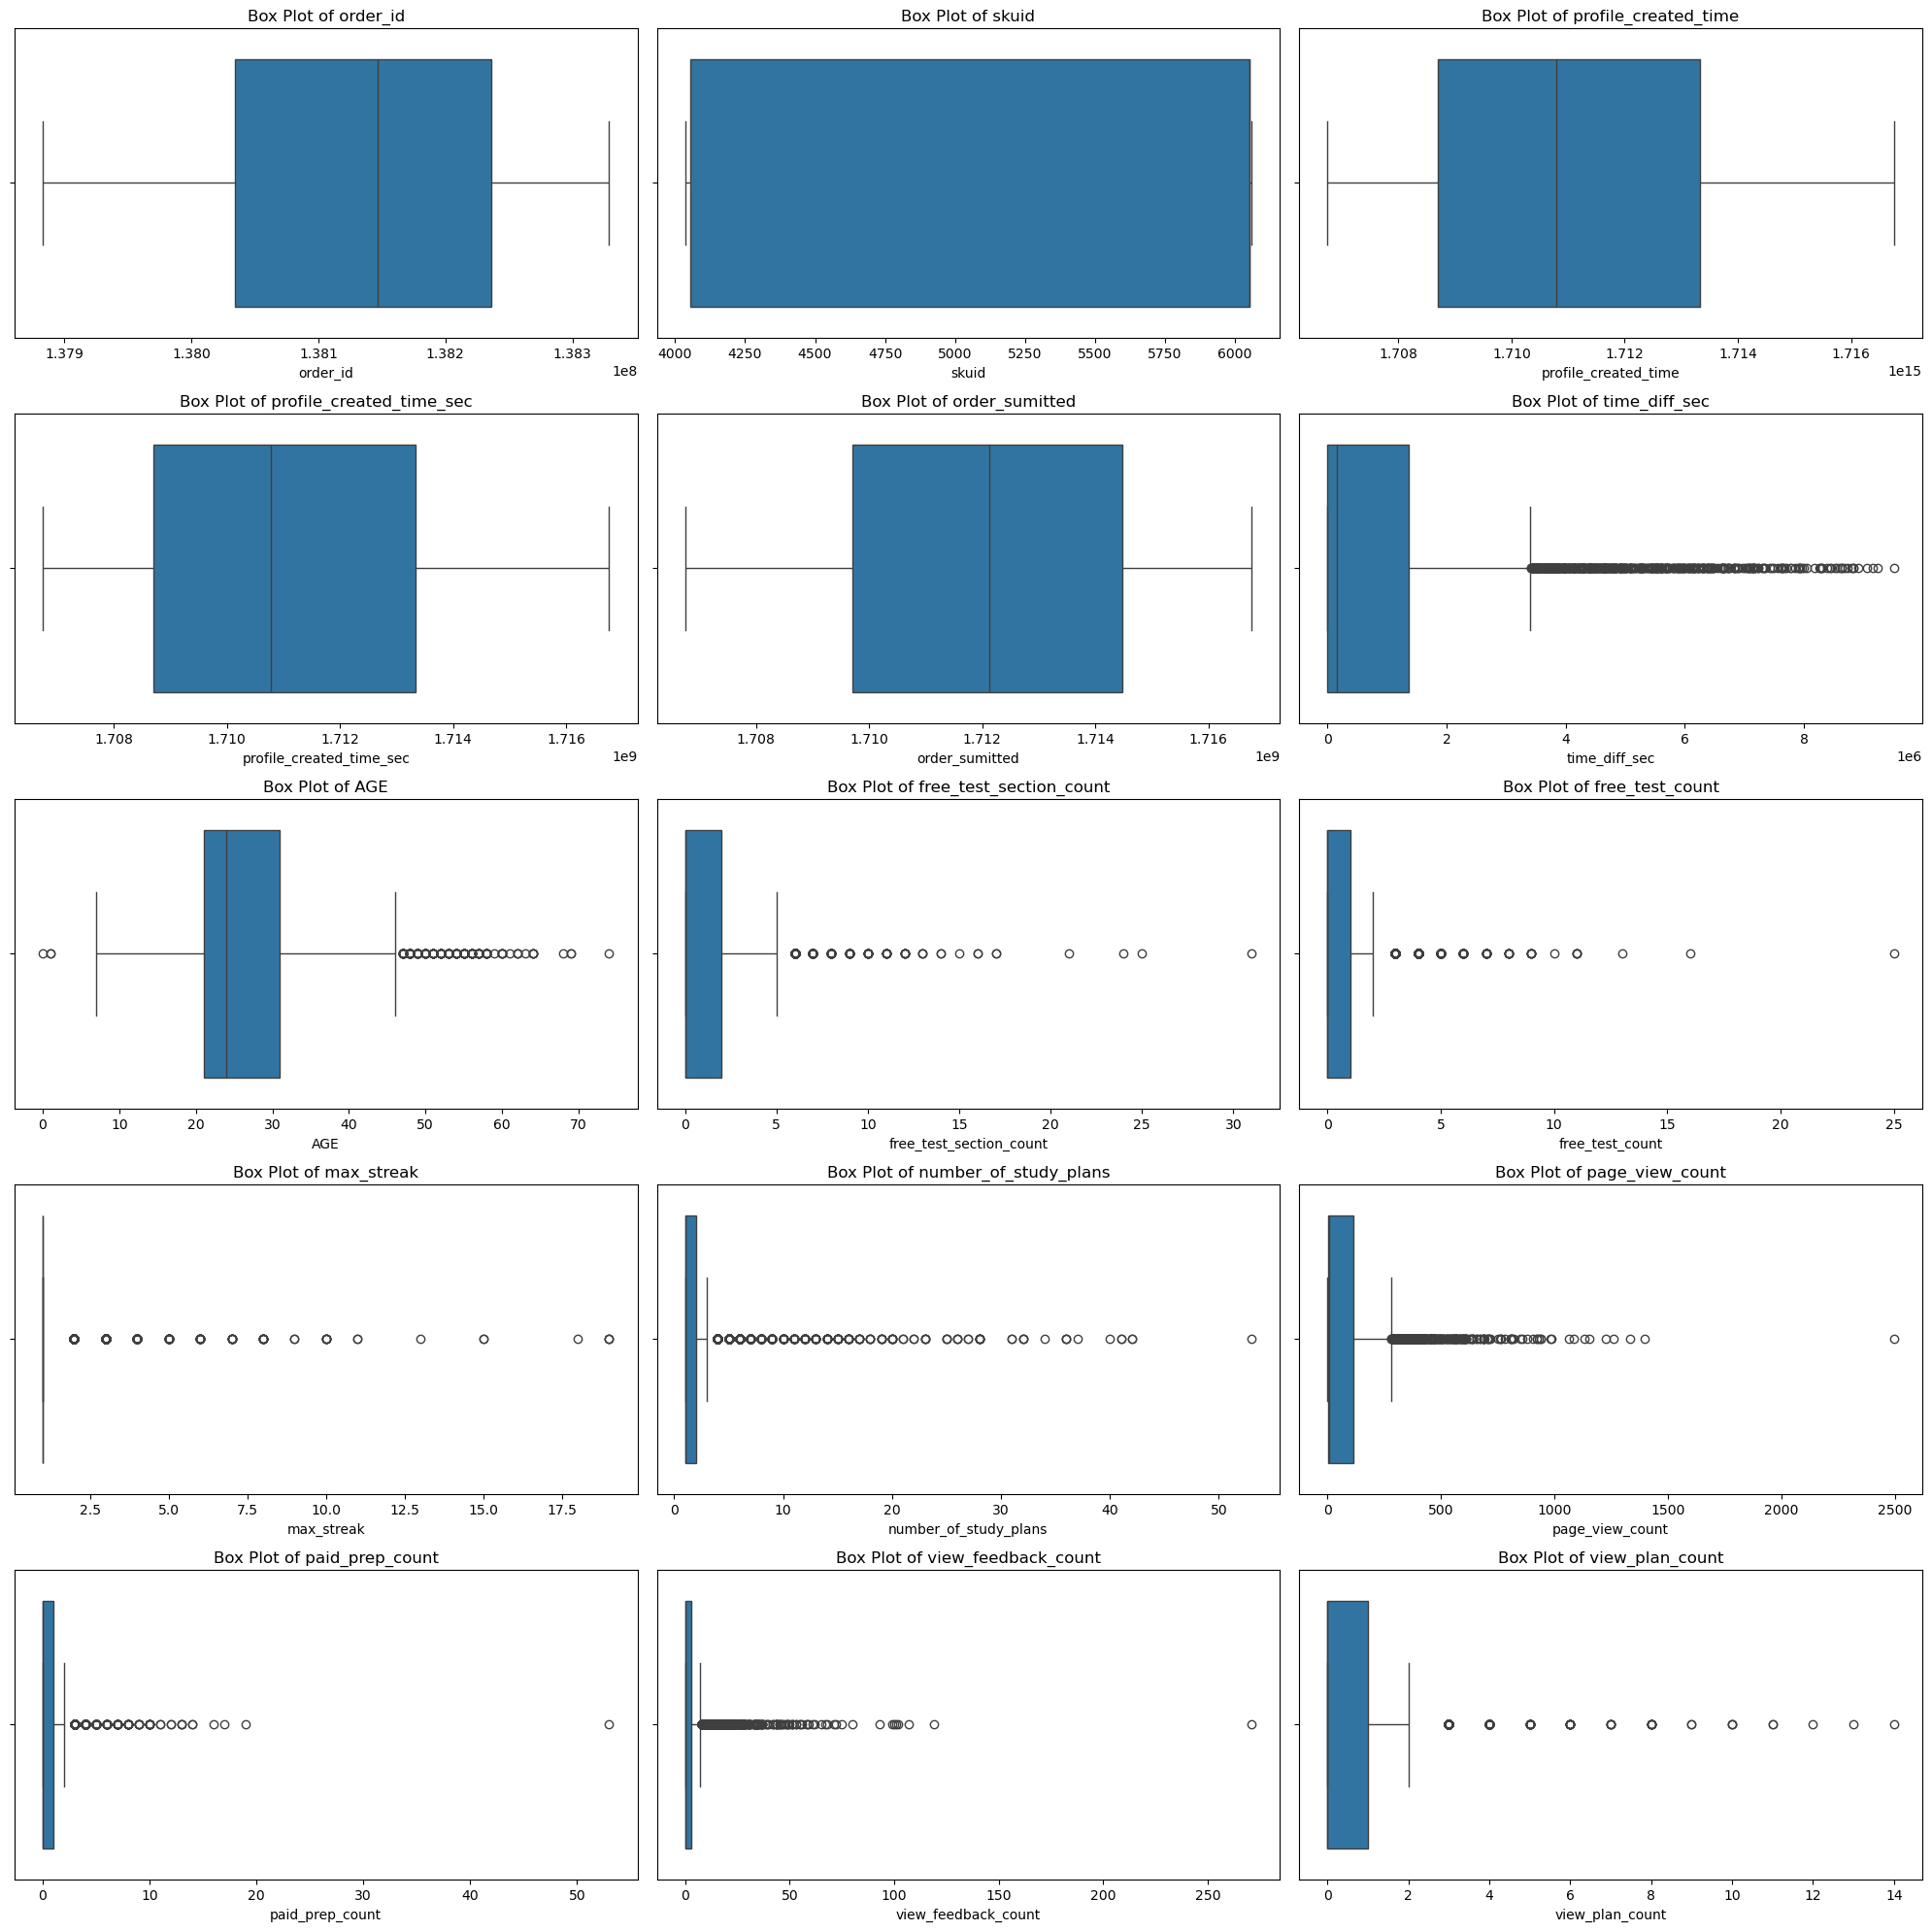

In [24]:
# Visual inspection using box plots for each numerical variable
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_variables, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data_encoded_filtered[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [25]:
# Save the updated dataset to a CSV file
filtered_file_path = 'New_cleaned_dataset.csv'
data_encoded_filtered.to_csv(filtered_file_path, index=False)

filtered_file_path


'New_cleaned_dataset.csv'

### PCA

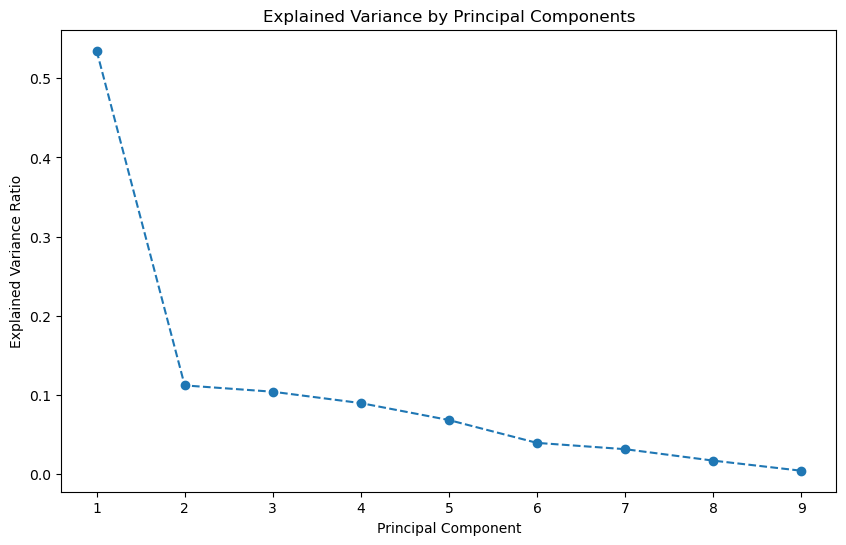

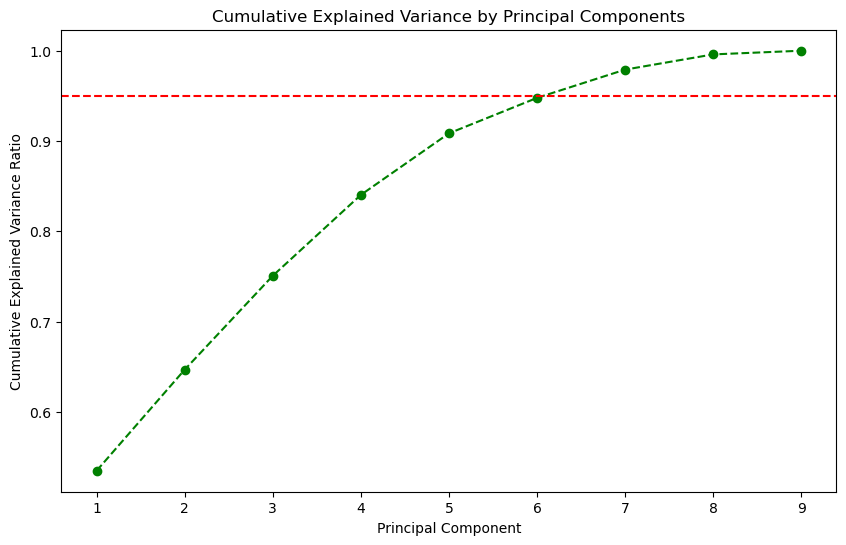

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,PC1,0.534962,0.534962
1,PC2,0.111902,0.646864
2,PC3,0.103933,0.750797
3,PC4,0.089548,0.840344
4,PC5,0.068143,0.908488
5,PC6,0.039267,0.947755
6,PC7,0.031310,0.979065
7,PC8,0.016860,0.995925
8,PC9,0.004075,1.000000


In [26]:
# Identify numerical variables in the dataset
numerical_variables = [
    'AGE', 'free_test_section_count', 'free_test_count', 'max_streak', 
    'number_of_study_plans', 'page_view_count', 'paid_prep_count', 
    'view_feedback_count', 'view_plan_count'
]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded_filtered[numerical_variables])

# Apply PCA to the full set of numerical variables
pca_full = PCA(n_components=len(numerical_variables))
principal_components_full = pca_full.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_full_df = pd.DataFrame(data=principal_components_full, columns=[f'PC{i+1}' for i in range(len(numerical_variables))])

# Explained variance for each principal component
explained_variance_full = pca_full.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numerical_variables) + 1), explained_variance_full, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(numerical_variables) + 1))
plt.show()

# Cumulative explained variance
cumulative_explained_variance = explained_variance_full.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numerical_variables) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(numerical_variables) + 1))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Display the explained variance and cumulative explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(numerical_variables))],
    'Explained Variance Ratio': explained_variance_full,
    'Cumulative Explained Variance Ratio': cumulative_explained_variance
})

explained_variance_df


### The PCA analysis on the dataset's numerical variables reveals the following:

#### Explained Variance:
- **PC1**: Captures 52.89% of the variance.
- **PC2**: Captures 11.26% of the variance.
- Together, the first two principal components explain 64.15% of the total variance.

#### Cumulative Explained Variance:
- The first 5 principal components explain 90.78% of the variance.
- The first 7 principal components explain 97.77% of the variance.
- All 9 components together explain 100% of the variance.


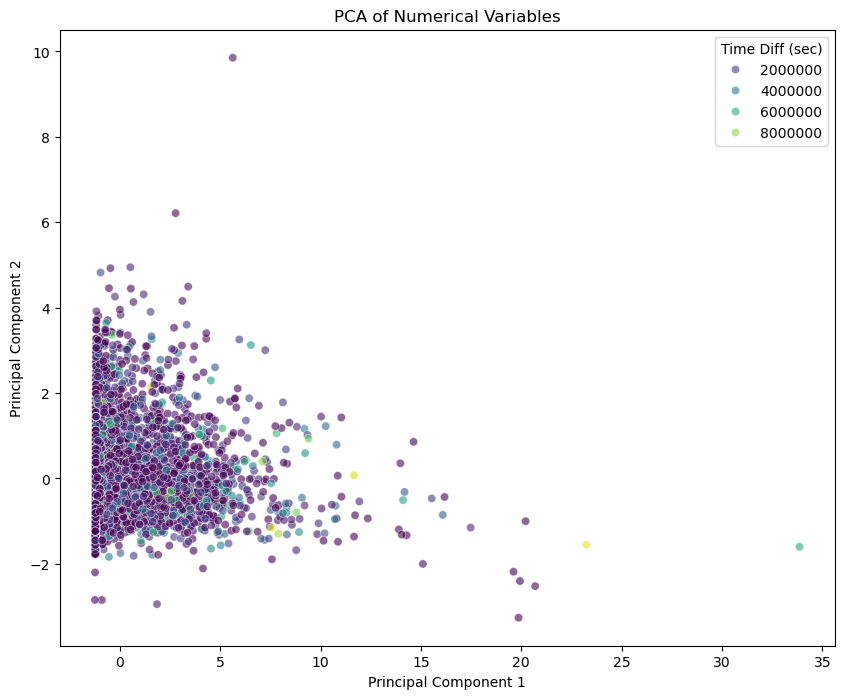

array([0.53496196, 0.11190198])

In [27]:
# Identify numerical variables in the dataset
numerical_variables = [
    'AGE', 'free_test_section_count', 'free_test_count', 'max_streak', 
    'number_of_study_plans', 'page_view_count', 'paid_prep_count', 
    'view_feedback_count', 'view_plan_count'
]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded_filtered[numerical_variables])

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable to the PCA DataFrame for coloring in the plot
pca_df['time_diff_sec'] = data['time_diff_sec']

# Plot the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='time_diff_sec', data=pca_df, palette='viridis', alpha=0.6)
plt.title('PCA of Numerical Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Time Diff (sec)')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

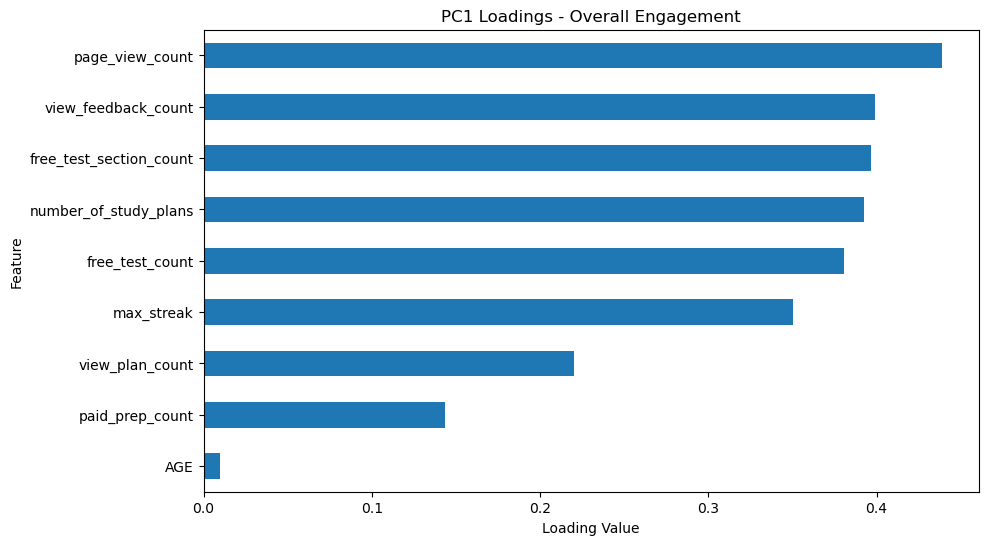

,PC1
AGE,0.009429
free_test_section_count,0.396810
free_test_count,0.380381
max_streak,0.350603
number_of_study_plans,0.392326
page_view_count,0.438752
paid_prep_count,0.143738
view_feedback_count,0.399134
view_plan_count,0.220112


In [28]:
# Create a DataFrame with the principal components
pca_full_df = pd.DataFrame(data=principal_components_full, columns=[f'PC{i+1}' for i in range(len(numerical_variables))])

# Extract the loadings (principal component coefficients)
loadings = pd.DataFrame(pca_full.components_.T, columns=[f'PC{i+1}' for i in range(len(numerical_variables))], index=numerical_variables)

# Visualize the loadings for PC1 (overall engagement)
plt.figure(figsize=(10, 6))
loadings['PC1'].sort_values().plot(kind='barh')
plt.title('PC1 Loadings - Overall Engagement')
plt.xlabel('Loading Value')
plt.ylabel('Feature')
plt.show()

# Display the loadings for PC1 to check overall engagement
loadings[['PC1']]

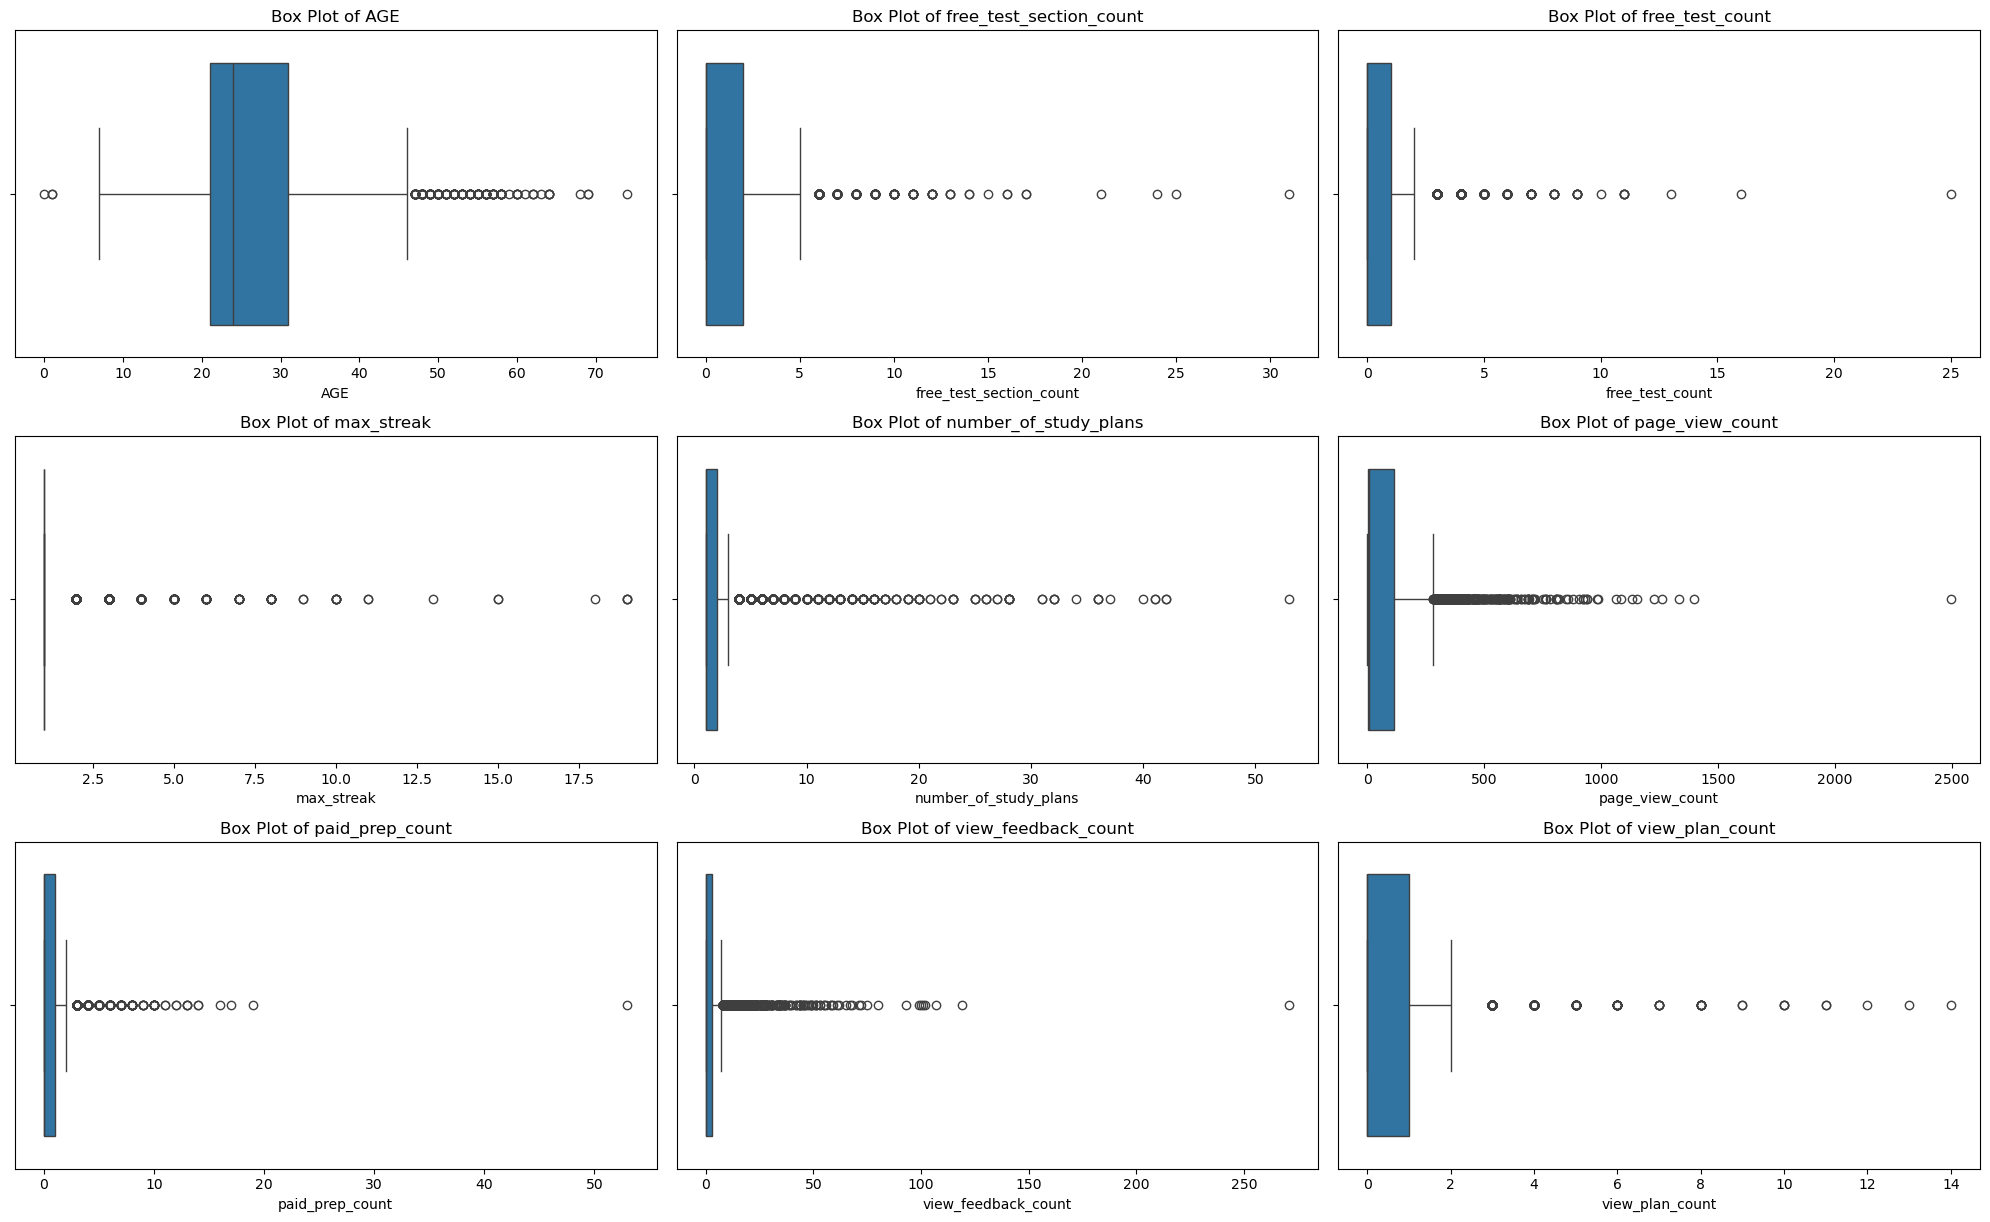

/tmp/ipykernel_6754/1737917826.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = data_encoded_filtered[(data_encoded_filtered[column] < lower_bound) | (data_encoded[column] > upper_bound)][column]
/tmp/ipykernel_6754/1737917826.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = data_encoded_filtered[(data_encoded_filtered[column] < lower_bound) | (data_encoded[column] > upper_bound)][column]
/tmp/ipykernel_6754/1737917826.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = data_encoded_filtered[(data_encoded_filtered[column] < lower_bound) | (data_encoded[column] > upper_bound)][column]
/tmp/ipykernel_6754/1737917826.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = data_encoded_filtered[(data_encoded_filtered[column] < lower_bound) | (data_encoded[column] > upper_bound)][colu

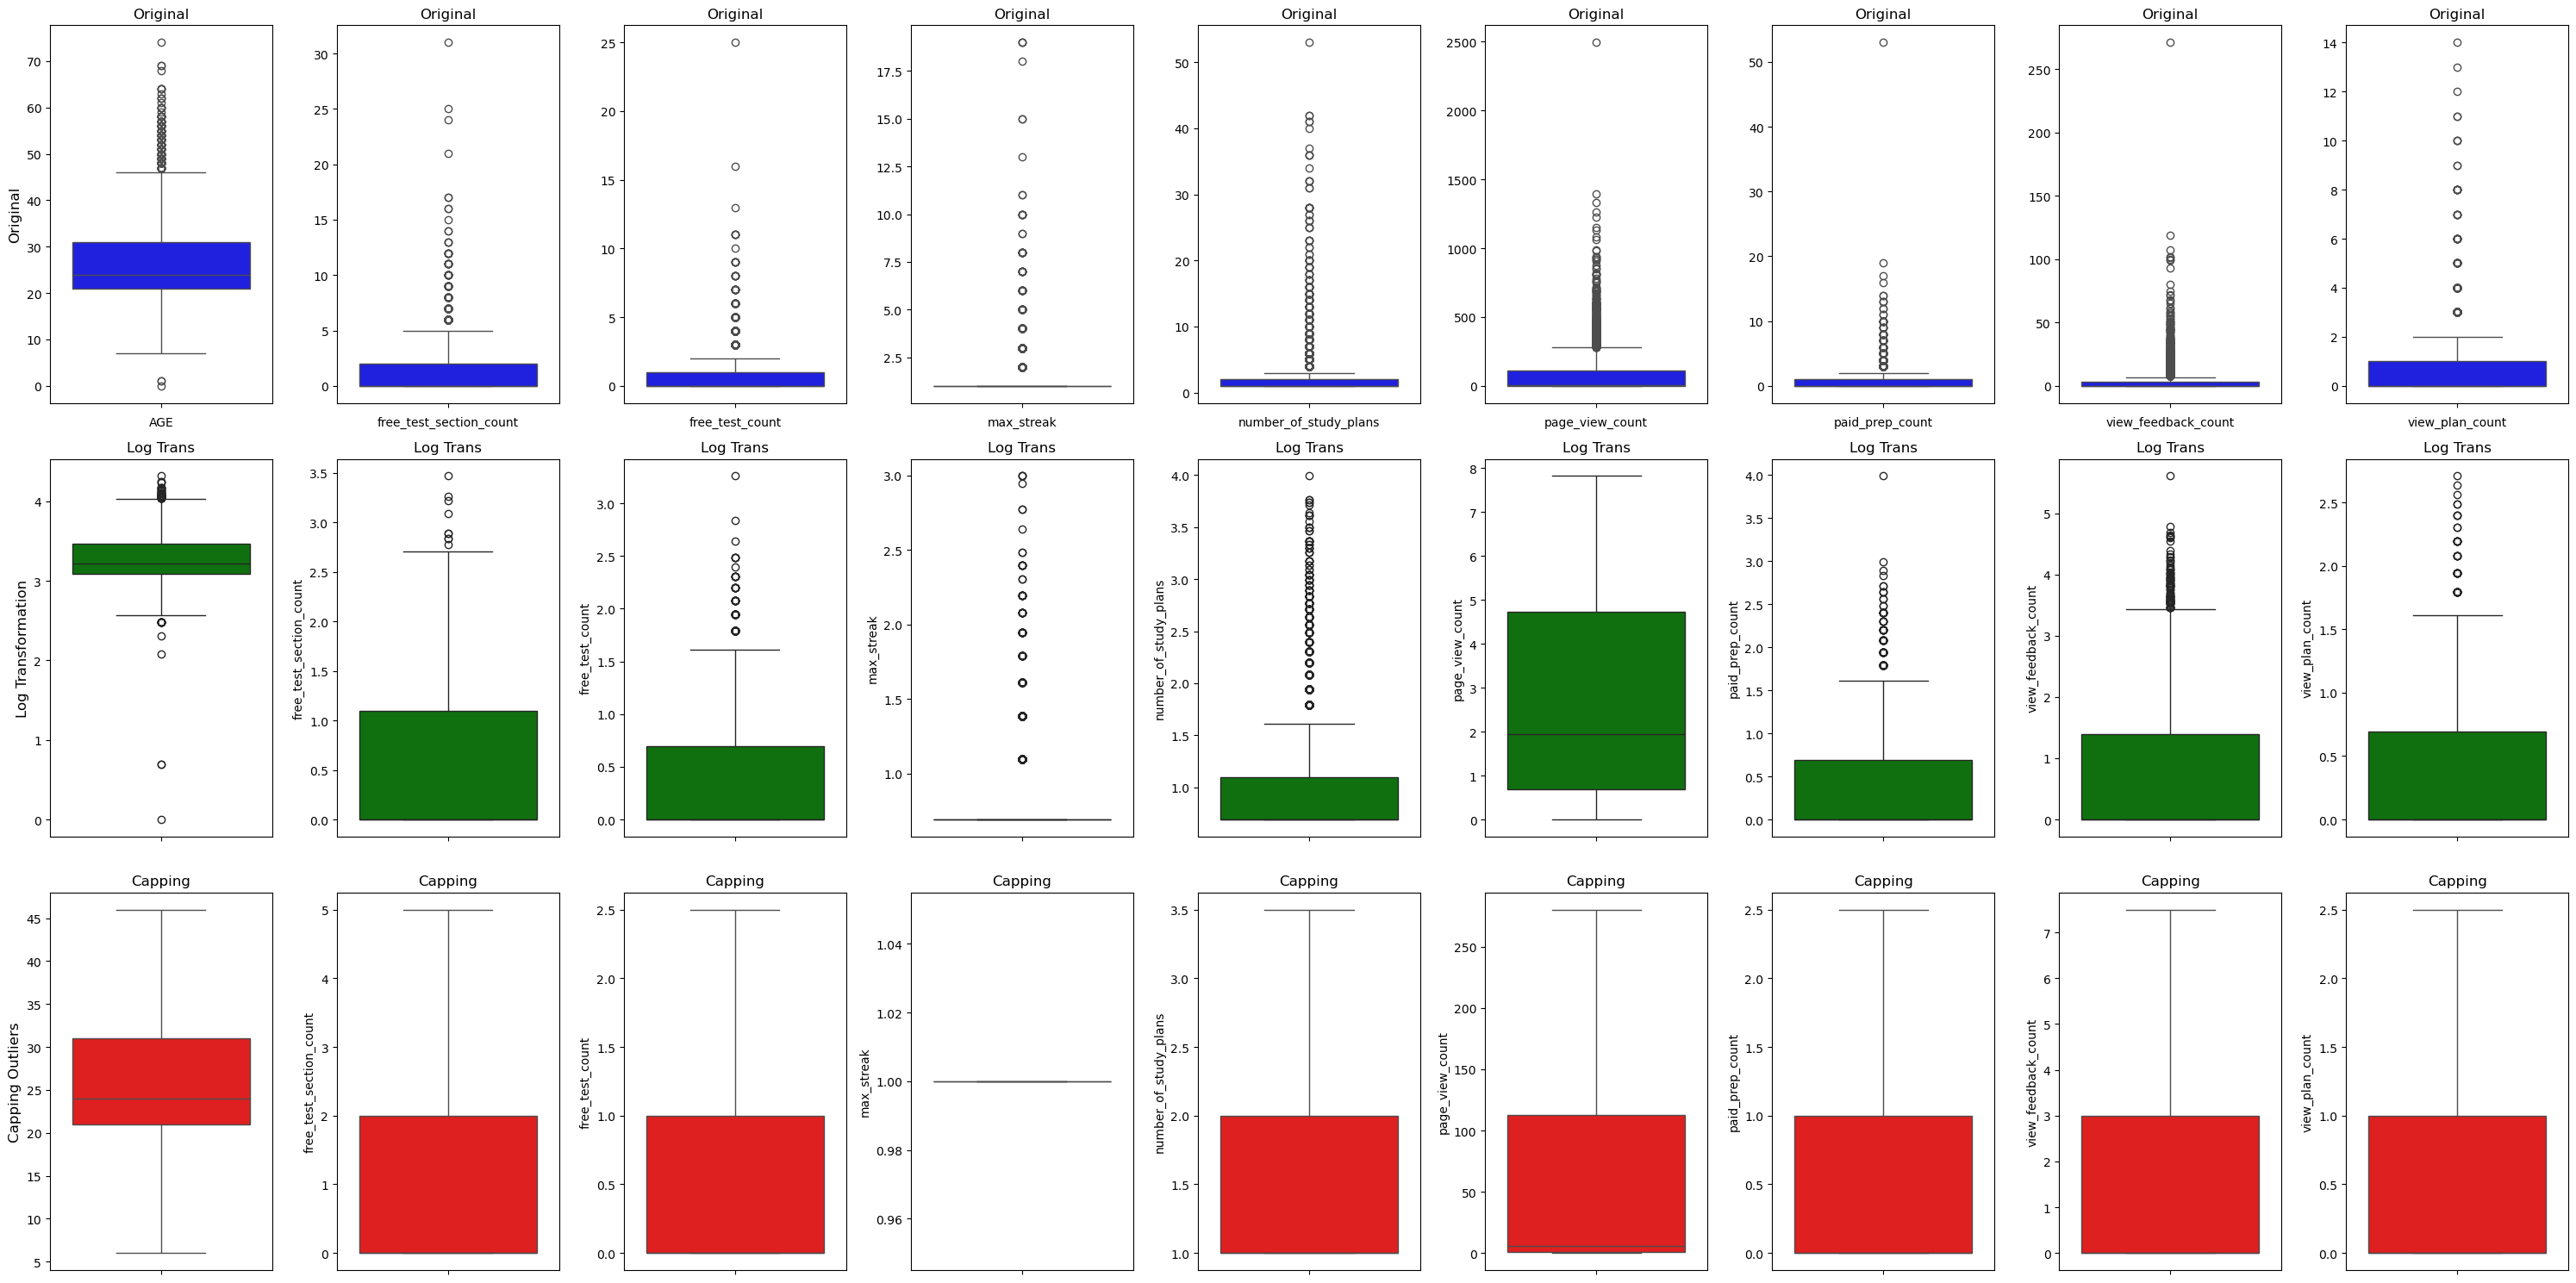

/tmp/ipykernel_6754/1737917826.py:117: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_capped[column], ax=axes[i, 2], color='red')


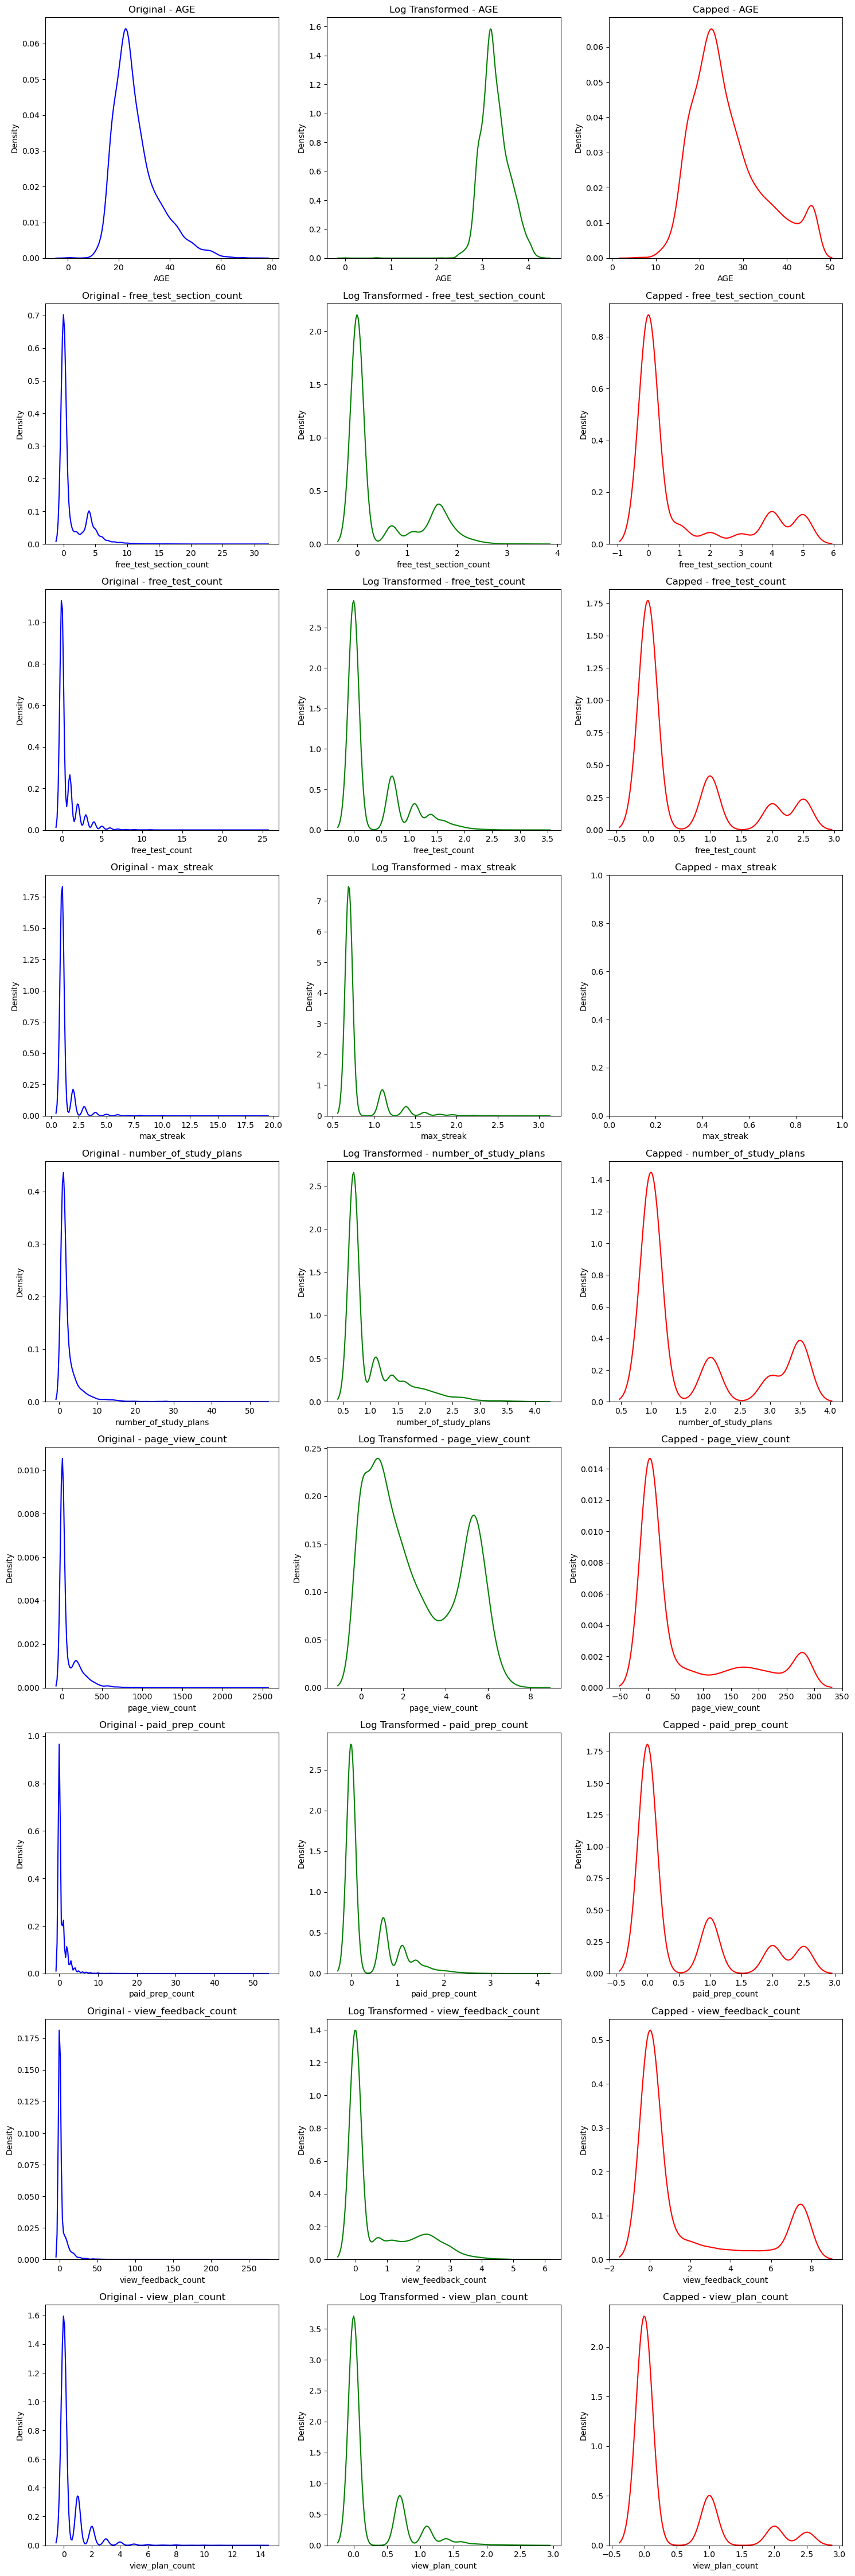

In [29]:
# Visual inspection using box plots for each numerical variable
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_variables, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data_encoded_filtered[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Identify outliers using the IQR method
outliers = {}

for column in numerical_variables:
    Q1 = data_encoded_filtered[column].quantile(0.25)
    Q3 = data_encoded_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data_encoded_filtered[(data_encoded_filtered[column] < lower_bound) | (data_encoded[column] > upper_bound)][column]

outliers_detected = {k: len(v) for k, v in outliers.items()}
outliers_detected

# List of continuous variables for transformation
continuous_variables = [
    'AGE', 'free_test_section_count', 'free_test_count', 'max_streak', 
    'number_of_study_plans', 'page_view_count', 'paid_prep_count', 
    'view_feedback_count', 'view_plan_count'
]

# Defining the log transformation function
def log_transform(x):
    return np.log(x + 1 - min(0, x.min()))

# Defining the capping outliers function
def cap_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x = np.where(x < lower_bound, lower_bound, x)
    x = np.where(x > upper_bound, upper_bound, x)
    return x

# Create copies of the DataFrame
df_transformed = data_encoded_filtered.copy()
df_capped = data_encoded_filtered.copy()

# Applying the log transformation to the continuous variables
df_transformed[continuous_variables] = df_transformed[continuous_variables].apply(log_transform, axis=0)

# Applying the capping outliers transformation to the continuous variables
df_capped[continuous_variables] = df_capped[continuous_variables].apply(cap_outliers, axis=0)

# Create subplots
fig, axes = plt.subplots(3, len(continuous_variables), figsize=(30, 15))

# Plotting the distributions
for i, col in enumerate(continuous_variables):
    # Original distribution
    sns.boxplot(data_encoded_filtered[col], ax=axes[0, i], color='blue').set_title('Original')
    
    # Distribution after log transformation
    sns.boxplot(df_transformed[col], ax=axes[1, i], color='green').set_title('Log Trans')
    
    # Distribution after capping outliers
    sns.boxplot(df_capped[col], ax=axes[2, i], color='red').set_title('Capping')

# Setting column titles and row labels correctly
for ax, col in zip(axes[0], continuous_variables):
    ax.set_xlabel(col)
    ax.set_ylabel('')

# Correctly setting row titles
axes[0, 0].set_ylabel('Original', size='large')
axes[1, 0].set_ylabel('Log Transformation', size='large')
axes[2, 0].set_ylabel('Capping Outliers', size='large')

plt.tight_layout()
plt.show()

# Calculate summary statistics for original, log-transformed, and capped variables
summary_stats = []

for column in continuous_variables:
    original_stats = data_encoded_filtered[column].describe()
    log_transformed_stats = df_transformed[column].describe()
    capped_stats = df_capped[column].describe()
    
    summary_stats.append({
        'Variable': column,
        'Original Mean': original_stats['mean'],
        'Original Median': original_stats['50%'],
        'Original Std Dev': original_stats['std'],
        'Log Transformed Mean': log_transformed_stats['mean'],
        'Log Transformed Median': log_transformed_stats['50%'],
        'Log Transformed Std Dev': log_transformed_stats['std'],
        'Capped Mean': capped_stats['mean'],
        'Capped Median': capped_stats['50%'],
        'Capped Std Dev': capped_stats['std']
    })

summary_df = pd.DataFrame(summary_stats)

# Plot density plots for visual comparison
fig, axes = plt.subplots(len(continuous_variables), 3, figsize=(15, len(continuous_variables) * 5))

for i, column in enumerate(continuous_variables):
    sns.kdeplot(data_encoded_filtered[column], ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Original - {column}')
    
    sns.kdeplot(df_transformed[column], ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Log Transformed - {column}')
    
    sns.kdeplot(df_capped[column], ax=axes[i, 2], color='red')
    axes[i, 2].set_title(f'Capped - {column}')

plt.tight_layout()
plt.show()


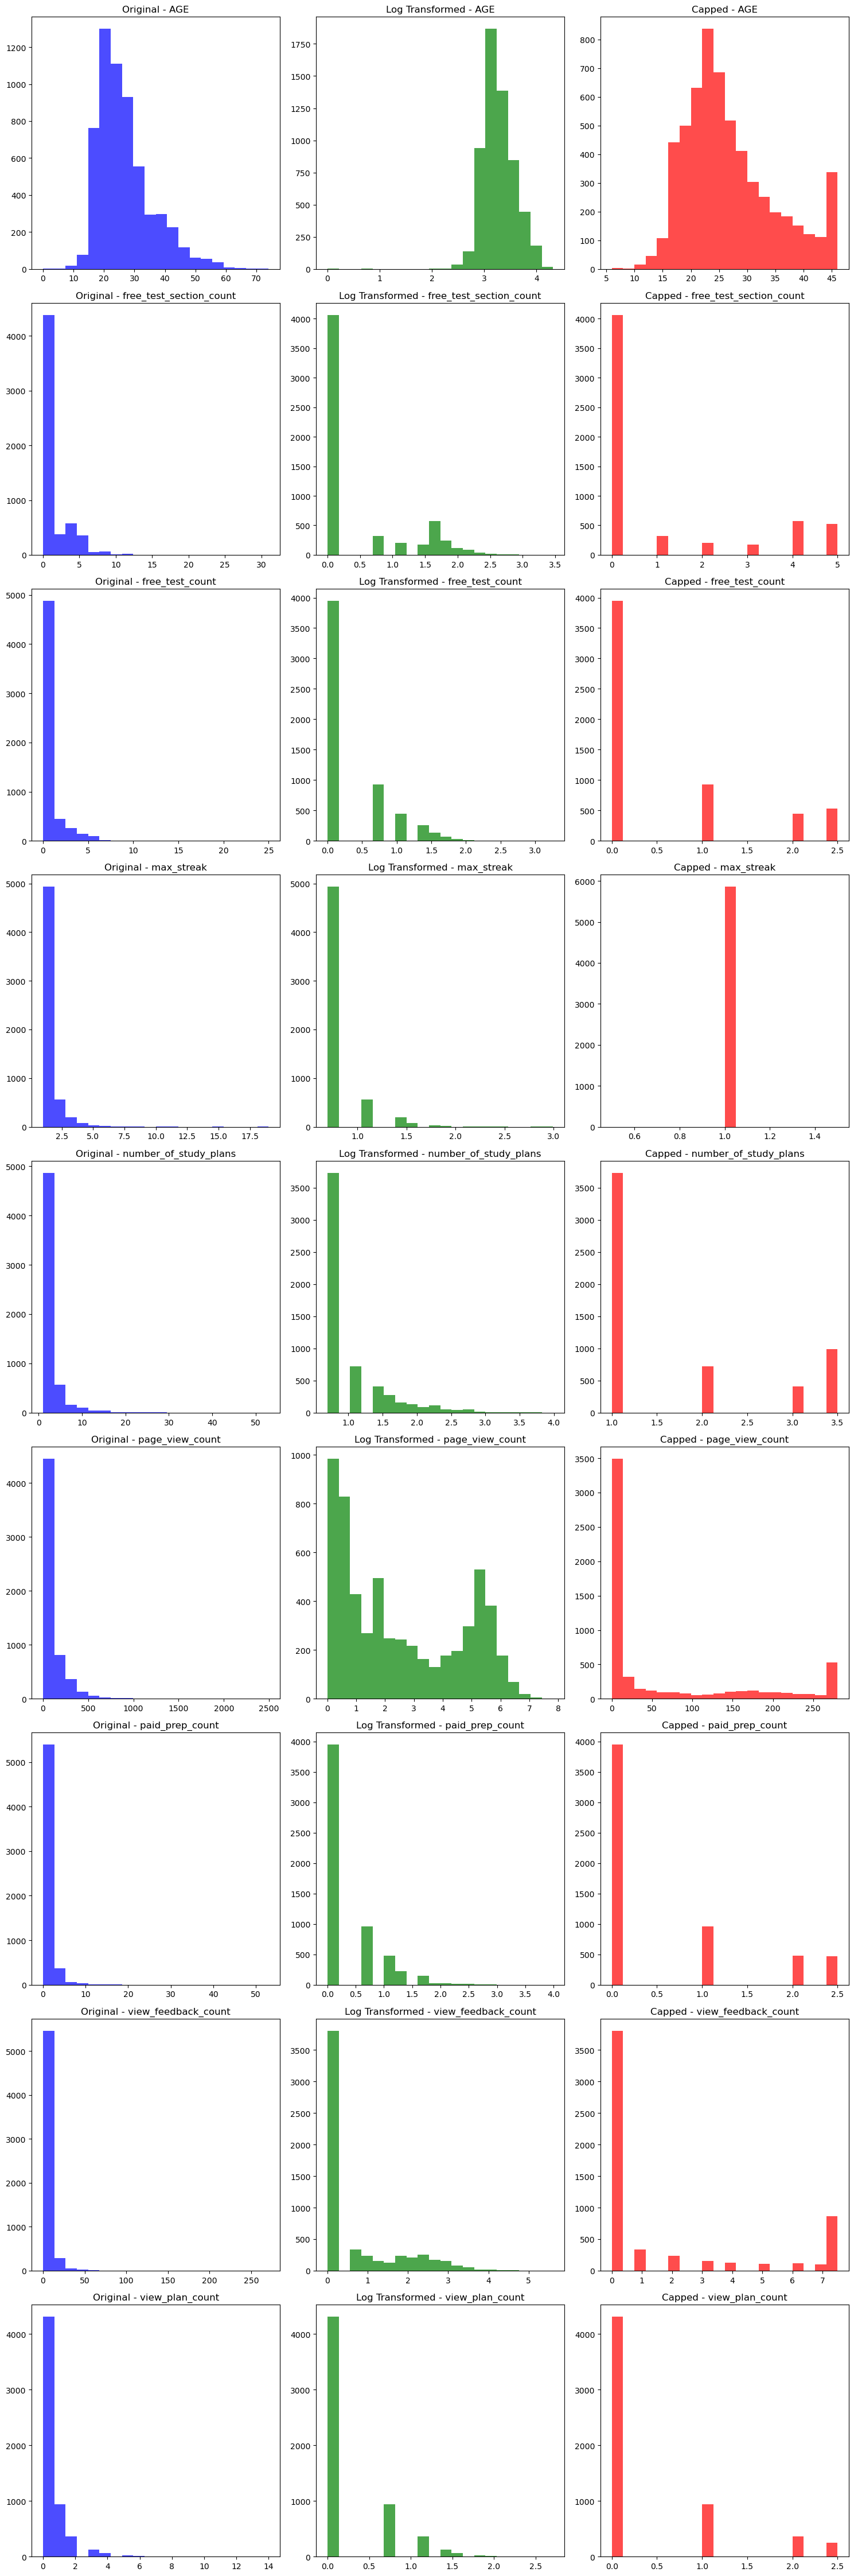

In [30]:
# Create subplots for histograms of original, log-transformed, and capped variables
fig, axes = plt.subplots(len(continuous_variables), 3, figsize=(15, len(continuous_variables) * 5))

for i, column in enumerate(continuous_variables):
    # Original distribution
    axes[i, 0].hist(data_encoded_filtered[column], bins=20, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original - {column}')
    
    # Distribution after log transformation
    axes[i, 1].hist(df_transformed[column], bins=20, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Log Transformed - {column}')
    
    # Distribution after capping outliers
    axes[i, 2].hist(df_capped[column], bins=20, color='red', alpha=0.7)
    axes[i, 2].set_title(f'Capped - {column}')

plt.tight_layout()
plt.show()


In [31]:
from scipy.stats import skew

# Calculate skewness for original variables
original_skewness = data_encoded_filtered[continuous_variables].apply(skew)

# Calculate skewness for log-transformed variables
log_transformed_skewness = df_transformed[continuous_variables].apply(skew)

# Calculate skewness for capped variables
capped_skewness = df_capped[continuous_variables].apply(skew)

# Combine skewness into a single DataFrame for comparison
skewness_df = pd.DataFrame({
    'Original': original_skewness,
    'Log Transformed': log_transformed_skewness,
    'Capped': capped_skewness
})



skewness_df


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


,Original,Log Transformed,Capped
AGE,1.210666,-0.034785,0.821250
free_test_section_count,2.756298,1.219270,1.332208
free_test_count,3.709382,1.402763,1.305494
max_streak,7.485892,3.360612,NaN
number_of_study_plans,5.322158,1.868748,0.981739
page_view_count,3.548201,0.383888,1.296817
paid_prep_count,9.089163,1.531059,1.317280
view_feedback_count,9.314959,1.330641,1.280706
view_plan_count,4.176136,1.774230,1.732690


In [32]:
# Calculate the correlation of each version of the variables with the target variable 'time_diff_sec'

# Correlation for original variables
original_corr = data_encoded_filtered[continuous_variables].corrwith(data_encoded_filtered['time_diff_sec'])

# Correlation for log-transformed variables
log_transformed_corr = df_transformed[continuous_variables].corrwith(data_encoded_filtered['time_diff_sec'])

# Correlation for capped variables
capped_corr = df_capped[continuous_variables].corrwith(data_encoded_filtered['time_diff_sec'])

# Combine correlations into a single DataFrame for comparison
correlation_df = pd.DataFrame({
    'Original': original_corr,
    'Log Transformed': log_transformed_corr,
    'Capped': capped_corr
})


correlation_df


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,Original,Log Transformed,Capped
AGE,-0.008687,0.000986,-0.008124
free_test_section_count,0.325198,0.332950,0.329931
free_test_count,0.387365,0.390622,0.382902
max_streak,0.222539,0.254349,NaN
number_of_study_plans,0.471263,0.538107,0.510230
page_view_count,0.373273,0.376437,0.371230
paid_prep_count,0.107519,0.147943,0.152550
view_feedback_count,0.311273,0.360569,0.341514
view_plan_count,0.216054,0.240824,0.244832


### Interpretation

Given the skewness, distribution analysis, and correlation with the target variable, log-transformed variables are still recommended for further analysis and modeling. They provide a balance between reducing skewness and maintaining meaningful correlations with the target variable.